In [1]:
from pylib.BenchmarkingUtil import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = '../simulated_bulk_analysis/report_data'
sample_id = 'truncated_bulk_rnaseq'

## Preparing input data

In [4]:
refFileList = getFiles(data_dir + '/reference/', 'reference')


refList = []
for file in refFileList:
    gtf, tsv = file[0], file[1]
    print("-Processing: gtf: {}, tsv: {}".format(gtf, tsv) + "\n\n") 
    if 'full' in gtf:   # Only merge ground truth counts with the full annotation GTF.
        refList.append(refCountsWithIntronIds(gtf, tsv))
    else:
        refList.append(GtfIntronIds(gtf))

refDf = pd.concat(refList, axis=1)  # Join all the reference annotations and the ground truth counts together.
for i in range(len(refList) - 1):   # Convert downsampled GTF columns to 1s and 0s to indicate whether a tx
    refDf.iloc[:, i] = refDf.iloc[:, i].notnull().astype("int")        # is or isn't in the downsampled set.


print(refDf)




-Processing: gtf: ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_10.gtf, tsv: ../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-Processing: gtf: ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_20.gtf, tsv: ../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-Processing: gtf: ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_30.gtf, tsv: ../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_downsampled_30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-Processing: gtf: ../simulated_bulk_analysis/report_data/reference/benchmark_full_annotations.gtf, tsv: ../simulated_bulk_analysis/report_data/reference/benchmark_transcript_expression.tsv


-processGtf( ../simulated_bulk_analysis/report_data/reference/benchmark_full_annotations.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


                 benchmark_downsampled_10  benchmark_downsampled_20  \
ENST00000000233                         1                         1   
ENST00000000412                         1                         1   
ENST00000001008                         1                         1   
ENST00000001146                         1                         1   
ENST00000002125                         1                         1   
...                                   ...                       ...   
ENST00000638374                         0                         0   
ENST00000638989                         0                         0   
ENST00000639658                         0                         0   
ENST00000640041                         0                         0   
ENST00000640432                         0                         0   

                 benchmark_downsampled_30  \
ENST00000000233                         1   
ENST00000000412                         1   
ENST00000001

In [5]:



is_kept = lambda x: 1 if (x == 1).any() else 0
concat_strings = lambda x: ",".join(x)
refDf = refDf.reset_index()
refDf = refDf.groupby('intronId').agg(
    benchmark_downsampled_10 = ('benchmark_downsampled_10', is_kept),
    benchmark_downsampled_20 = ('benchmark_downsampled_20', is_kept),
    benchmark_downsampled_30 = ('benchmark_downsampled_30', is_kept),
    benchmark_transcript_expression = ('benchmark_transcript_expression', 'sum'),
    index = ('index', concat_strings)
)
refDf = refDf.reset_index()
refDf = refDf.set_index('index')
refDf.index.name = None
refDf = refDf[['benchmark_downsampled_10', 'benchmark_downsampled_20', 'benchmark_downsampled_30',
               'intronId', 'benchmark_transcript_expression']]

In [6]:
refDf.head()

benchmark_downsampled_10  benchmark_downsampled_20  \
ENST00000370418                         1                         1   
ENST00000421367                         1                         1   
ENST00000370397                         1                         1   
ENST00000354105                         1                         1   
ENST00000618916                         1                         1   

                 benchmark_downsampled_30  \
ENST00000370418                         1   
ENST00000421367                         1   
ENST00000370397                         1   
ENST00000354105                         1   
ENST00000618916                         1   

                                                          intronId  \
ENST00000370418  10:100042573-100048757:-,10:100048876-10005434...   
ENST00000421367  10:100152352-100154859:-,10:100154939-10015614...   
ENST00000370397  10:100189627-100190868:-,10:100190968-10019329...   
ENST00000354105  10:100233371-100235666:-,10:100235764-10023684...   
ENST00000618916  10:100275493-100280123:-,10:100280228-10028093...   

                 benchmark_transcript_expression  
ENST00000370418                         0.285346  
ENST00000421367                        72.049779  
ENST00000370397                        18.690141  
ENST00000354105                        25.966455  
ENST00000618916                         0.428018

In [7]:
refDf.copy().reset_index().to_csv("refDf.intron_ids_and_expression.tsv", sep="\t", index=False)

In [8]:
# quants based on the full ref annot
fileList = getFiles('{0}/{1}_quant/'.format(data_dir, sample_id), 'sample')
annotatedDfList = []
for file in fileList:
    gtf, tsv = file[0], file[1]
    annotatedDfList.append(countsWithIntronIds(gtf, tsv))

-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/LRAA.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/bambu.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/espresso.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/flair.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isoquant.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/isosceles.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/liqa.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_quant/nanocount.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id']


In [9]:
# has the downsampled gtfs as guides
fileList = getFiles('{0}/{1}_denovo/'.format(data_dir, sample_id), 'sample')
dfList = []
for file in fileList:
    gtf, tsv = file[0], file[1]
    dfList.append(countsWithIntronIds(gtf, tsv))

-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/LRAA_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/bambu_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down10.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down20.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/espresso_down30.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/flair_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isoquant_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_denovo/isosceles_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


In [10]:
for df in dfList:
    sample_name = df.columns[-1]
    df.copy().reset_index().to_csv(sample_name + ".intron_ids_and_expr.tsv", sep="\t", index=False)

In [11]:
fileList = getFiles('{0}/{1}_stringtie/'.format(data_dir, sample_id), 'sample')
stringtieDfList = []
for file in fileList:
    gtf, tsv = file[0], file[1]
    stringtieDfList.append(countsWithIntronIds(gtf, tsv))

-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/LRAA_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/LRAA_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/LRAA_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/bambu_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/bambu_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/bambu_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/bambu_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/bambu_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/bambu_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/espresso_down10.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/espresso_down20.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/espresso_down30.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/espresso_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/espresso_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/espresso_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/flair_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/flair_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/flair_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/flair_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/flair_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/flair_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isoquant_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isoquant_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isoquant_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_version', 'transcript_id', 'transcript_version', 'exon_number', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_name', 'transcript_source', 'transcript_biotype', 'exon_id', 'exon_version', 'tag', 'transcript_support_level', 'ccds_id', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isoquant_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isoquant_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isoquant_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number', 'exons', 'similar_reference_id', 'alternatives', 'exon']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_IsoQuant_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_IsoQuant_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_IsoQuant_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/isosceles_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/liqa_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down10.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down20.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


-processGtf( ../simulated_bulk_analysis/report_data/truncated_bulk_rnaseq_stringtie/nanocount_stringtie_down30.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'ref_gene_id', 'exon_number']


In [12]:
best_options = ["bambu_stringtie", "espresso_stringtie", "flair", "isoquant_stringtie", "isosceles",
                "isosceles_stringtie", "isosceles_IsoQuant", "liqa_stringtie", "nanocount_stringtie", "LRAA"]
bestDfList = [x for x in stringtieDfList if "_".join(x.columns[1].split("_")[:-1]) in best_options]

## Plots

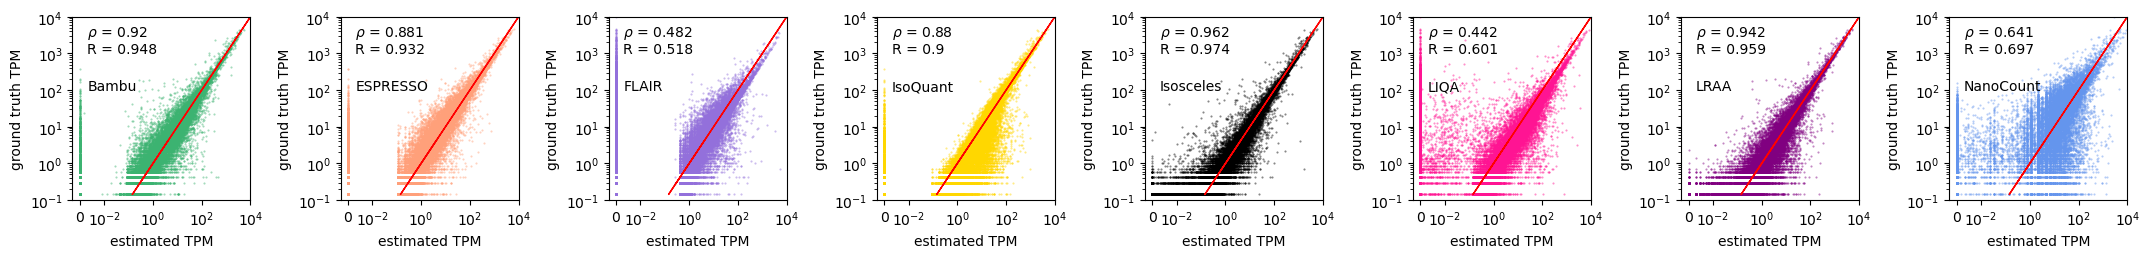

In [13]:
scatterplot(refDf, annotatedDfList, 8)

In [14]:
os.getcwd()

'/home/bhaas/projects/Isosceles_review/Isosceles_Paper/reports'

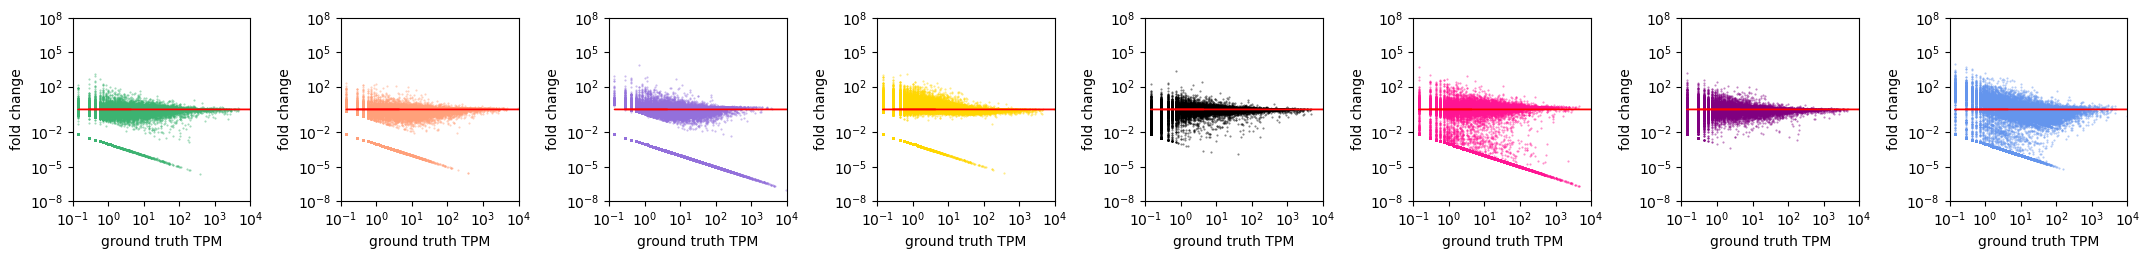

In [15]:
maplot(refDf, annotatedDfList, 8)

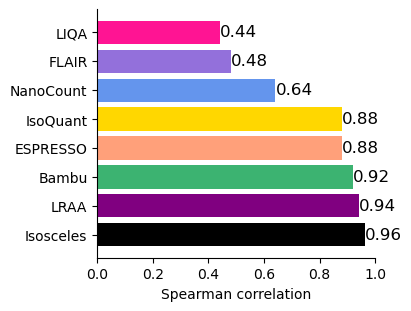

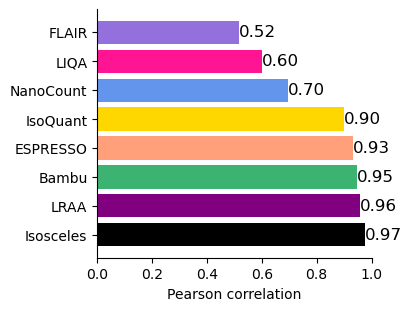

In [16]:
cor_spearman_barplot(refDf, annotatedDfList)
cor_pearson_barplot(refDf, annotatedDfList)

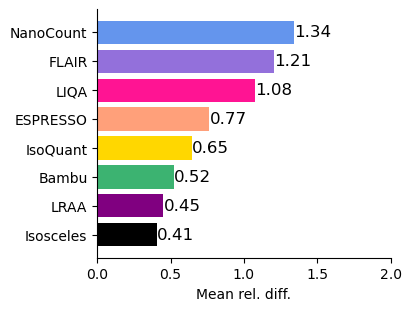

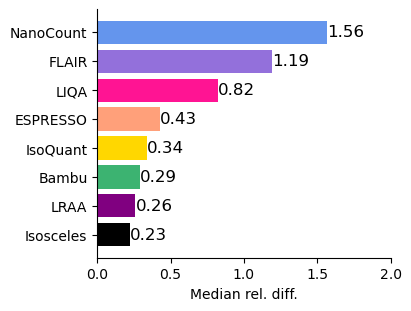

In [17]:
rel_diff_barplot(refDf, annotatedDfList, 'mean')
rel_diff_barplot(refDf, annotatedDfList, 'median')

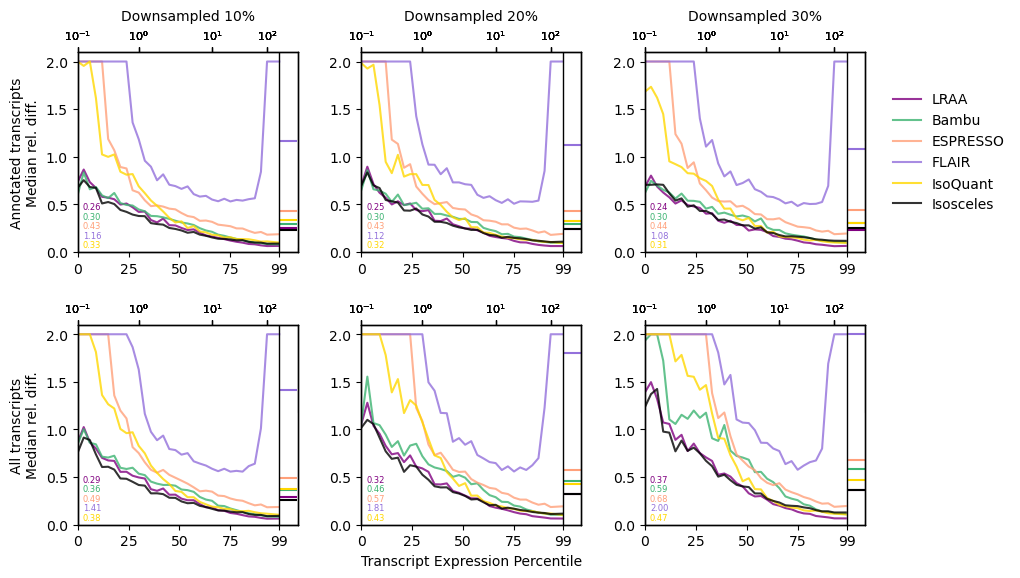

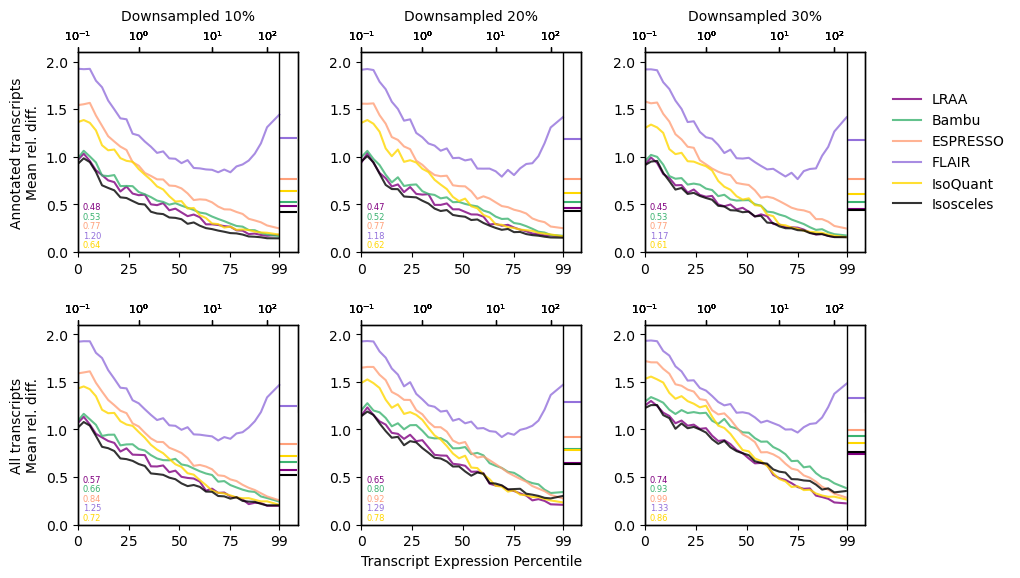

In [18]:
errorPlot(refDf, dfList, 33, 'median')
errorPlot(refDf, dfList, 33, 'mean')

## Median rel diffs for annotated or all transcripts
## for down 10, 20, and 30

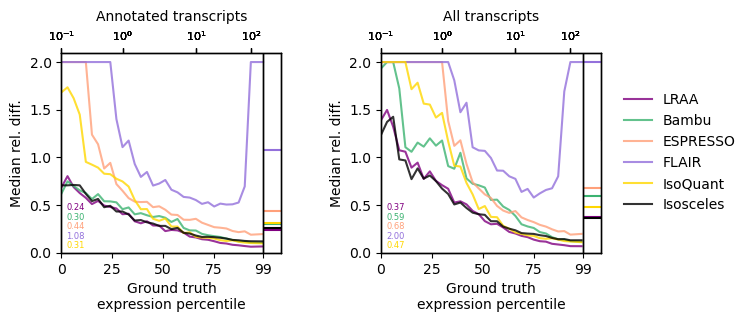

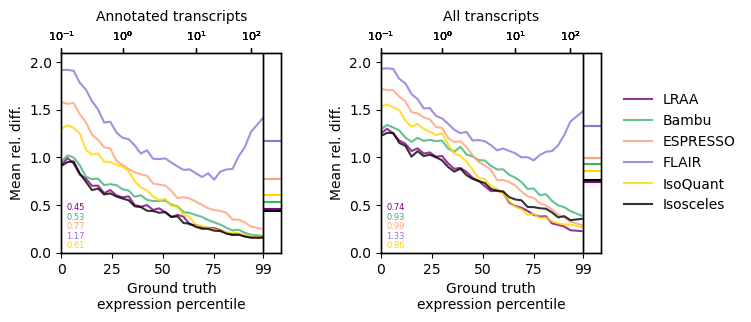

In [19]:
singleDownsampledErrorPlot(refDf, dfList, 33, 'median', 30)
singleDownsampledErrorPlot(refDf, dfList, 33, 'mean', 30)

# Only showing the down-30 set.

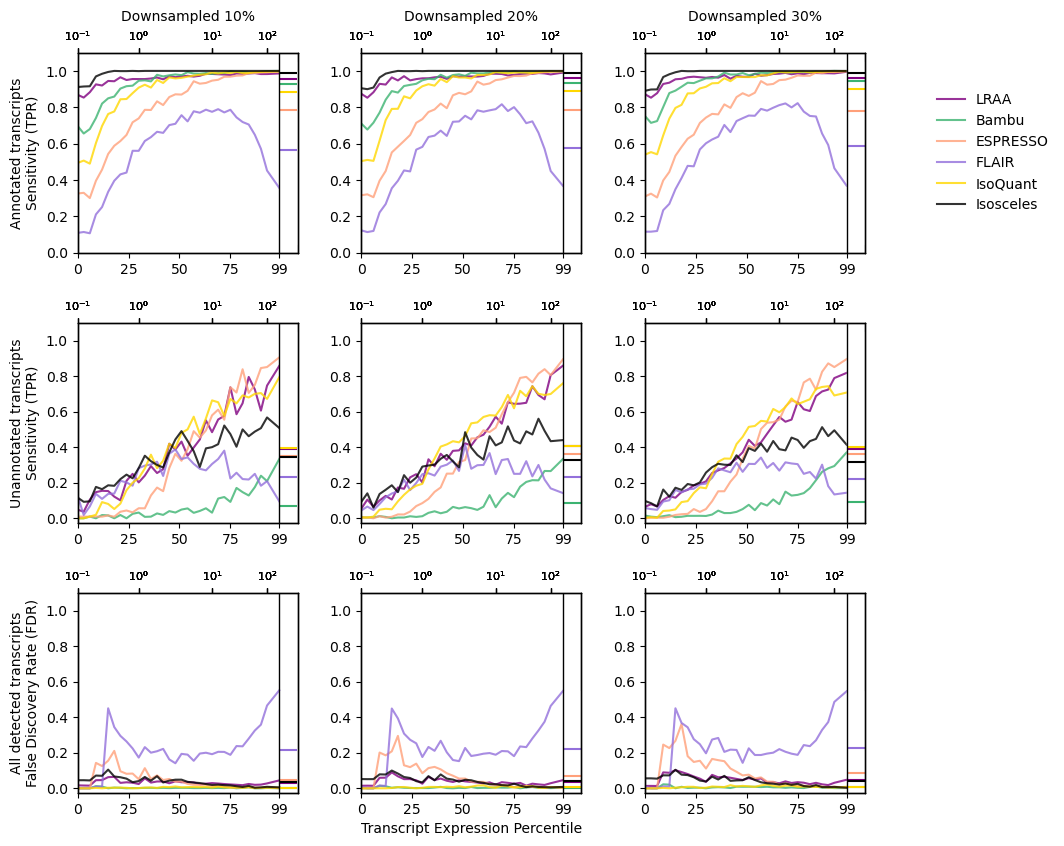

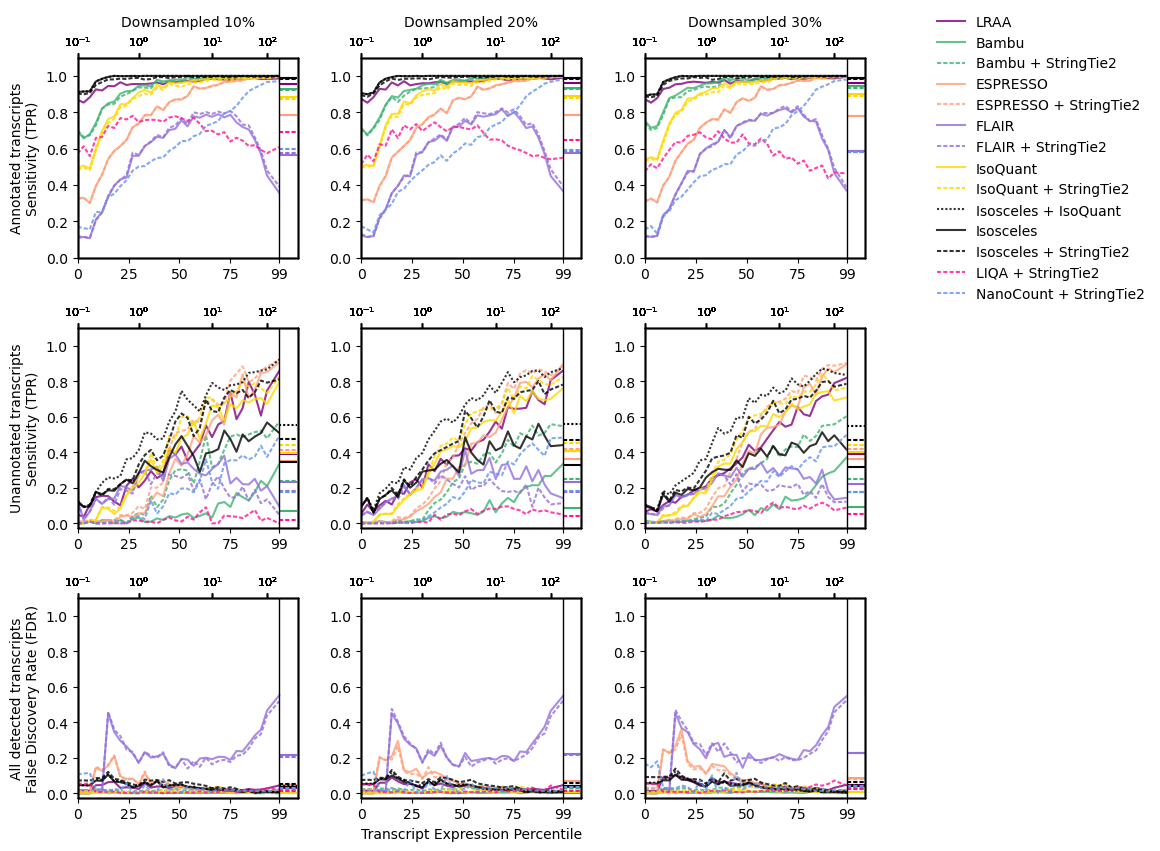

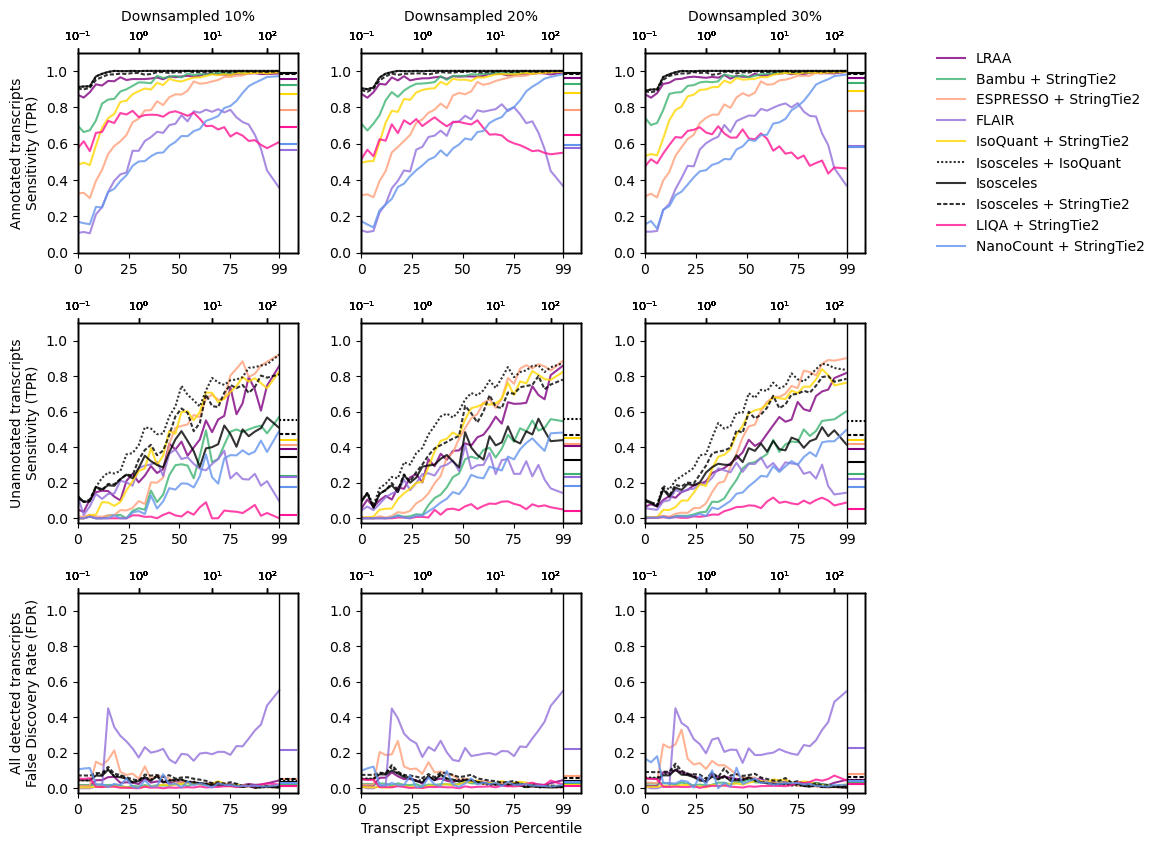

In [20]:
sensitivityPlot(refDf, dfList, 33, False)
sensitivityPlot(refDf, stringtieDfList, 33, False)
sensitivityPlot(refDf, bestDfList, 33, True)


## Annotated transcript sensitivity
## Unannotated transcript sensitivity
## and FDR 
## according to expression percentile
## for down-10, 20, and 30

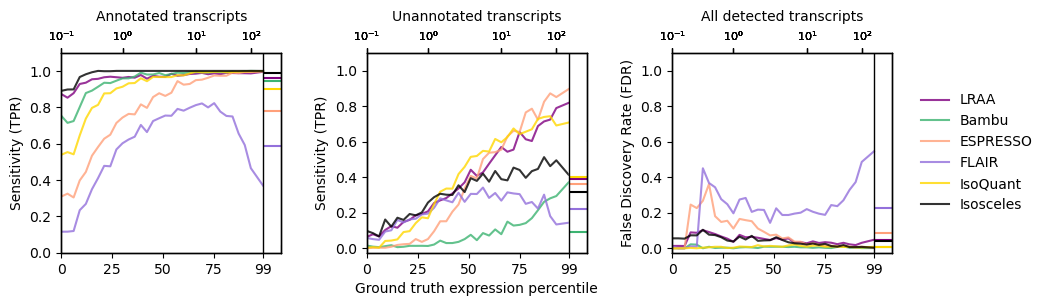

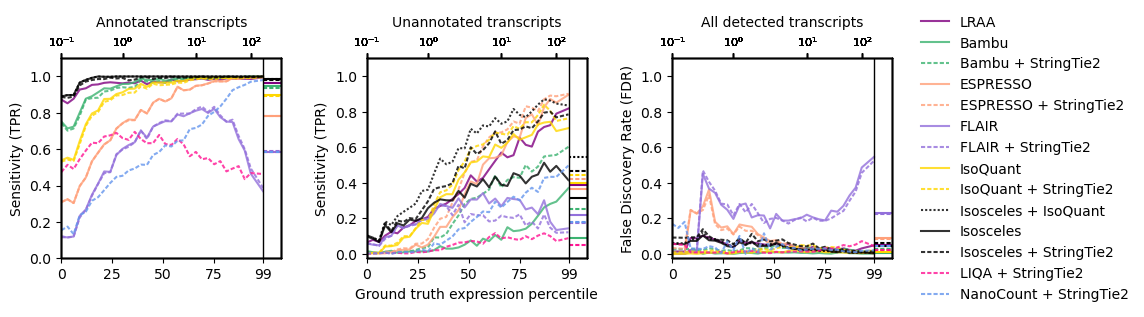

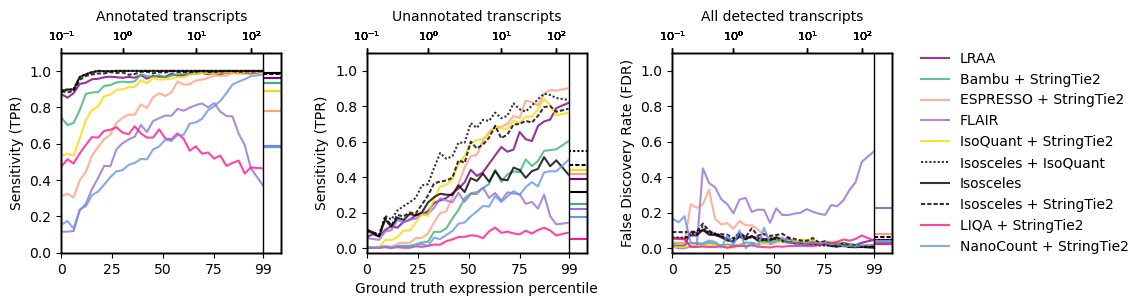

In [21]:
singleDownsampledSensitivityPlot(refDf, dfList, 33, 30, False)
singleDownsampledSensitivityPlot(refDf, stringtieDfList, 33, 30, False)
singleDownsampledSensitivityPlot(refDf, bestDfList, 33, 30, True)

## Annotated transcript sensitivity
## Unannotated transcript sensitivity
## and all transcripts FDR
## for down-30 set


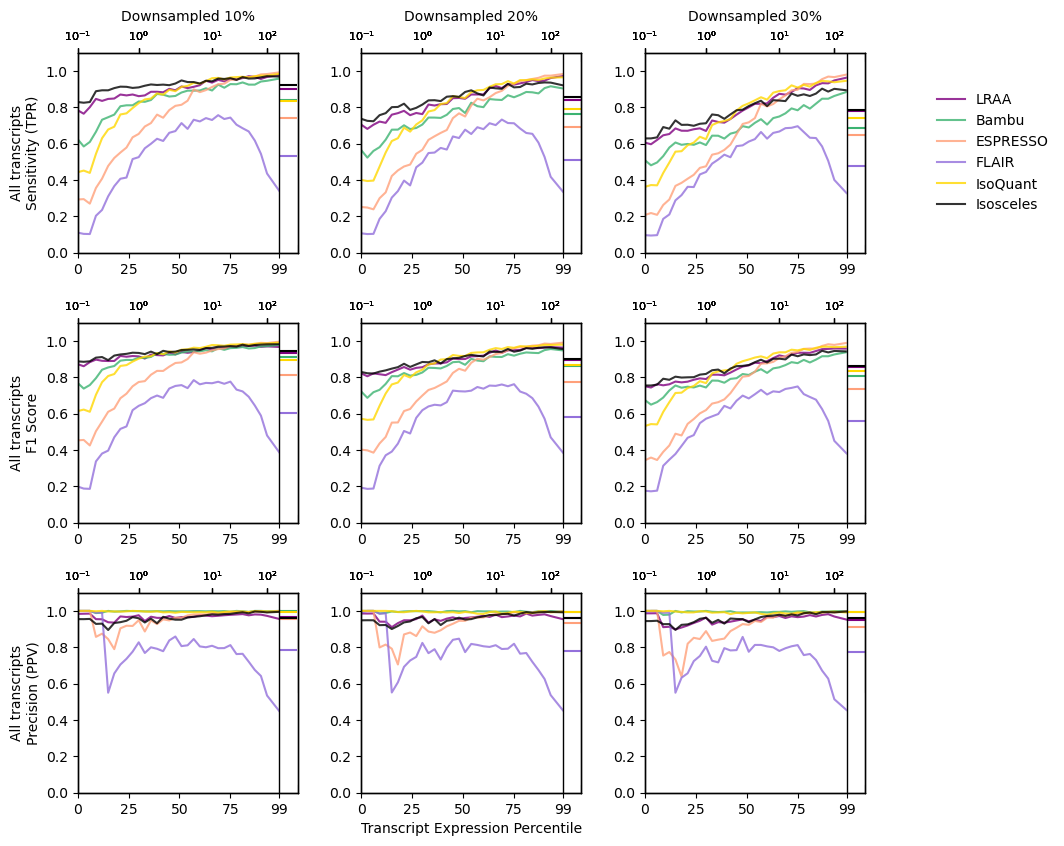

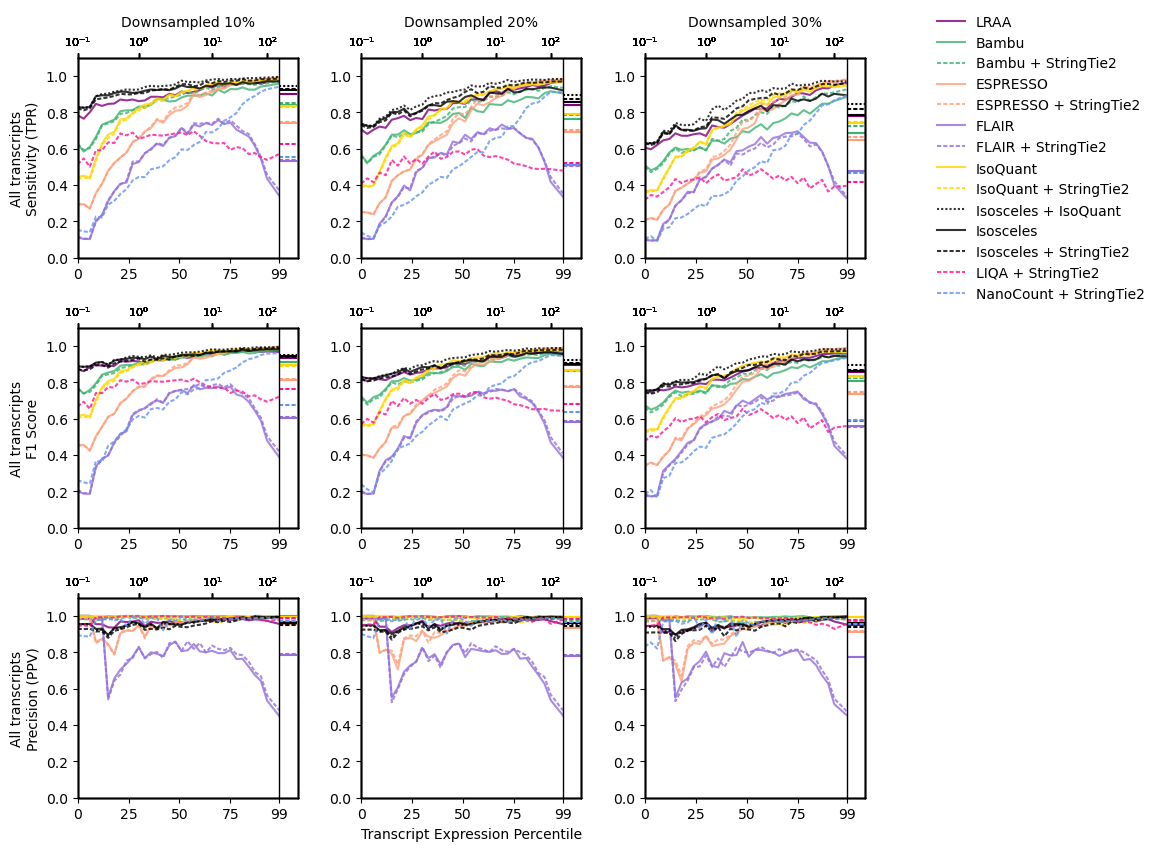

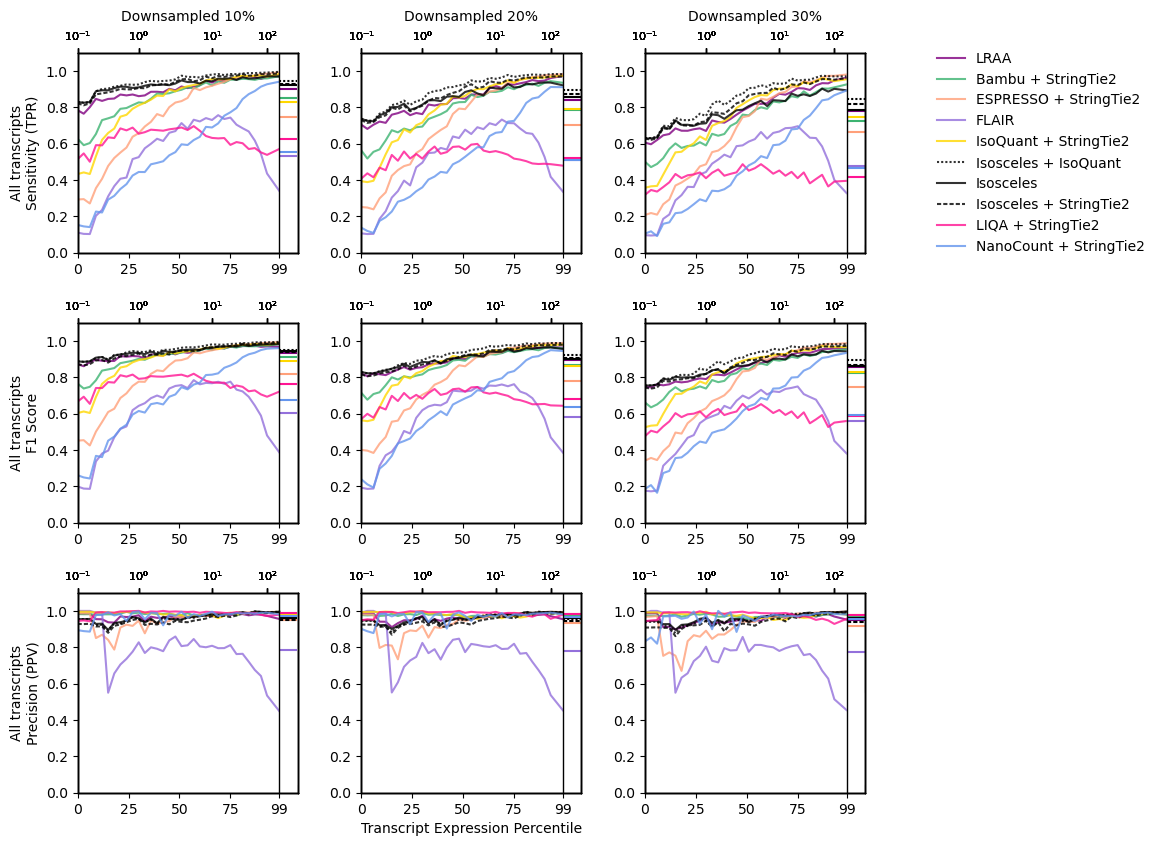

In [22]:
overallStatsPlot(refDf, dfList, 33, False)
overallStatsPlot(refDf, stringtieDfList, 33, False)
overallStatsPlot(refDf, bestDfList, 33, True)

## all transcripts sensitivity, F1 score, and PPV vs. expression percentile
## for down 10, 20, and 30


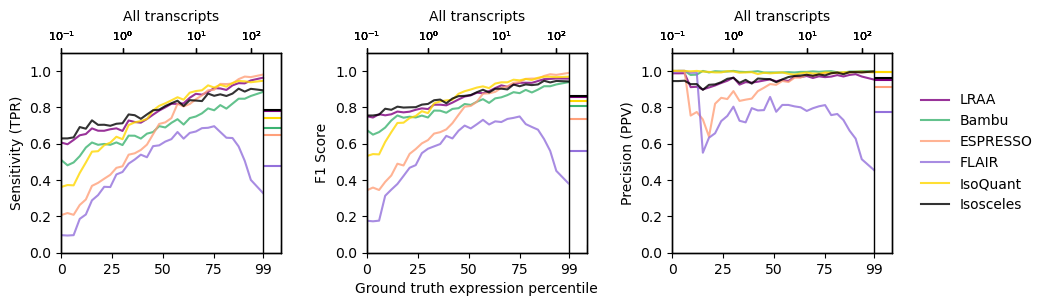

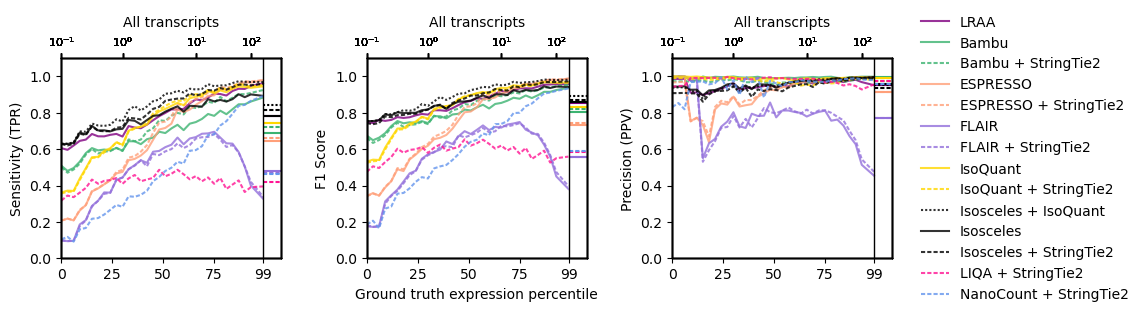

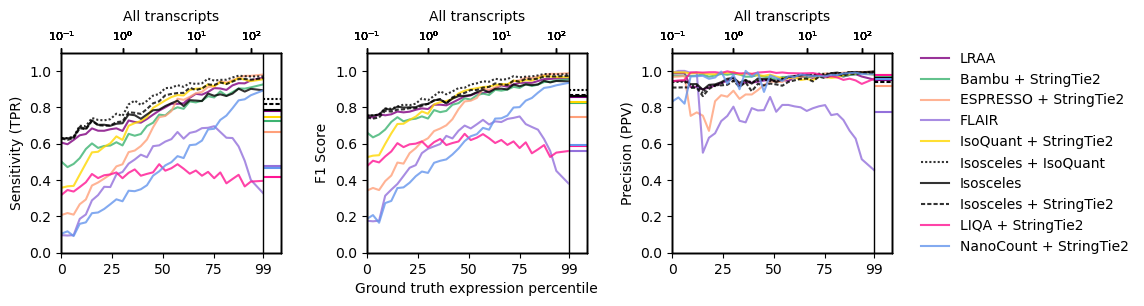

In [23]:
singleDownsampledOverallStatsPlot(refDf, dfList, 33, 30, False)
singleDownsampledOverallStatsPlot(refDf, stringtieDfList, 33, 30, False)
singleDownsampledOverallStatsPlot(refDf, bestDfList, 33, 30, True)

## sensitivity, F1 score, adn PPV for all transcripts in down-30 only set.

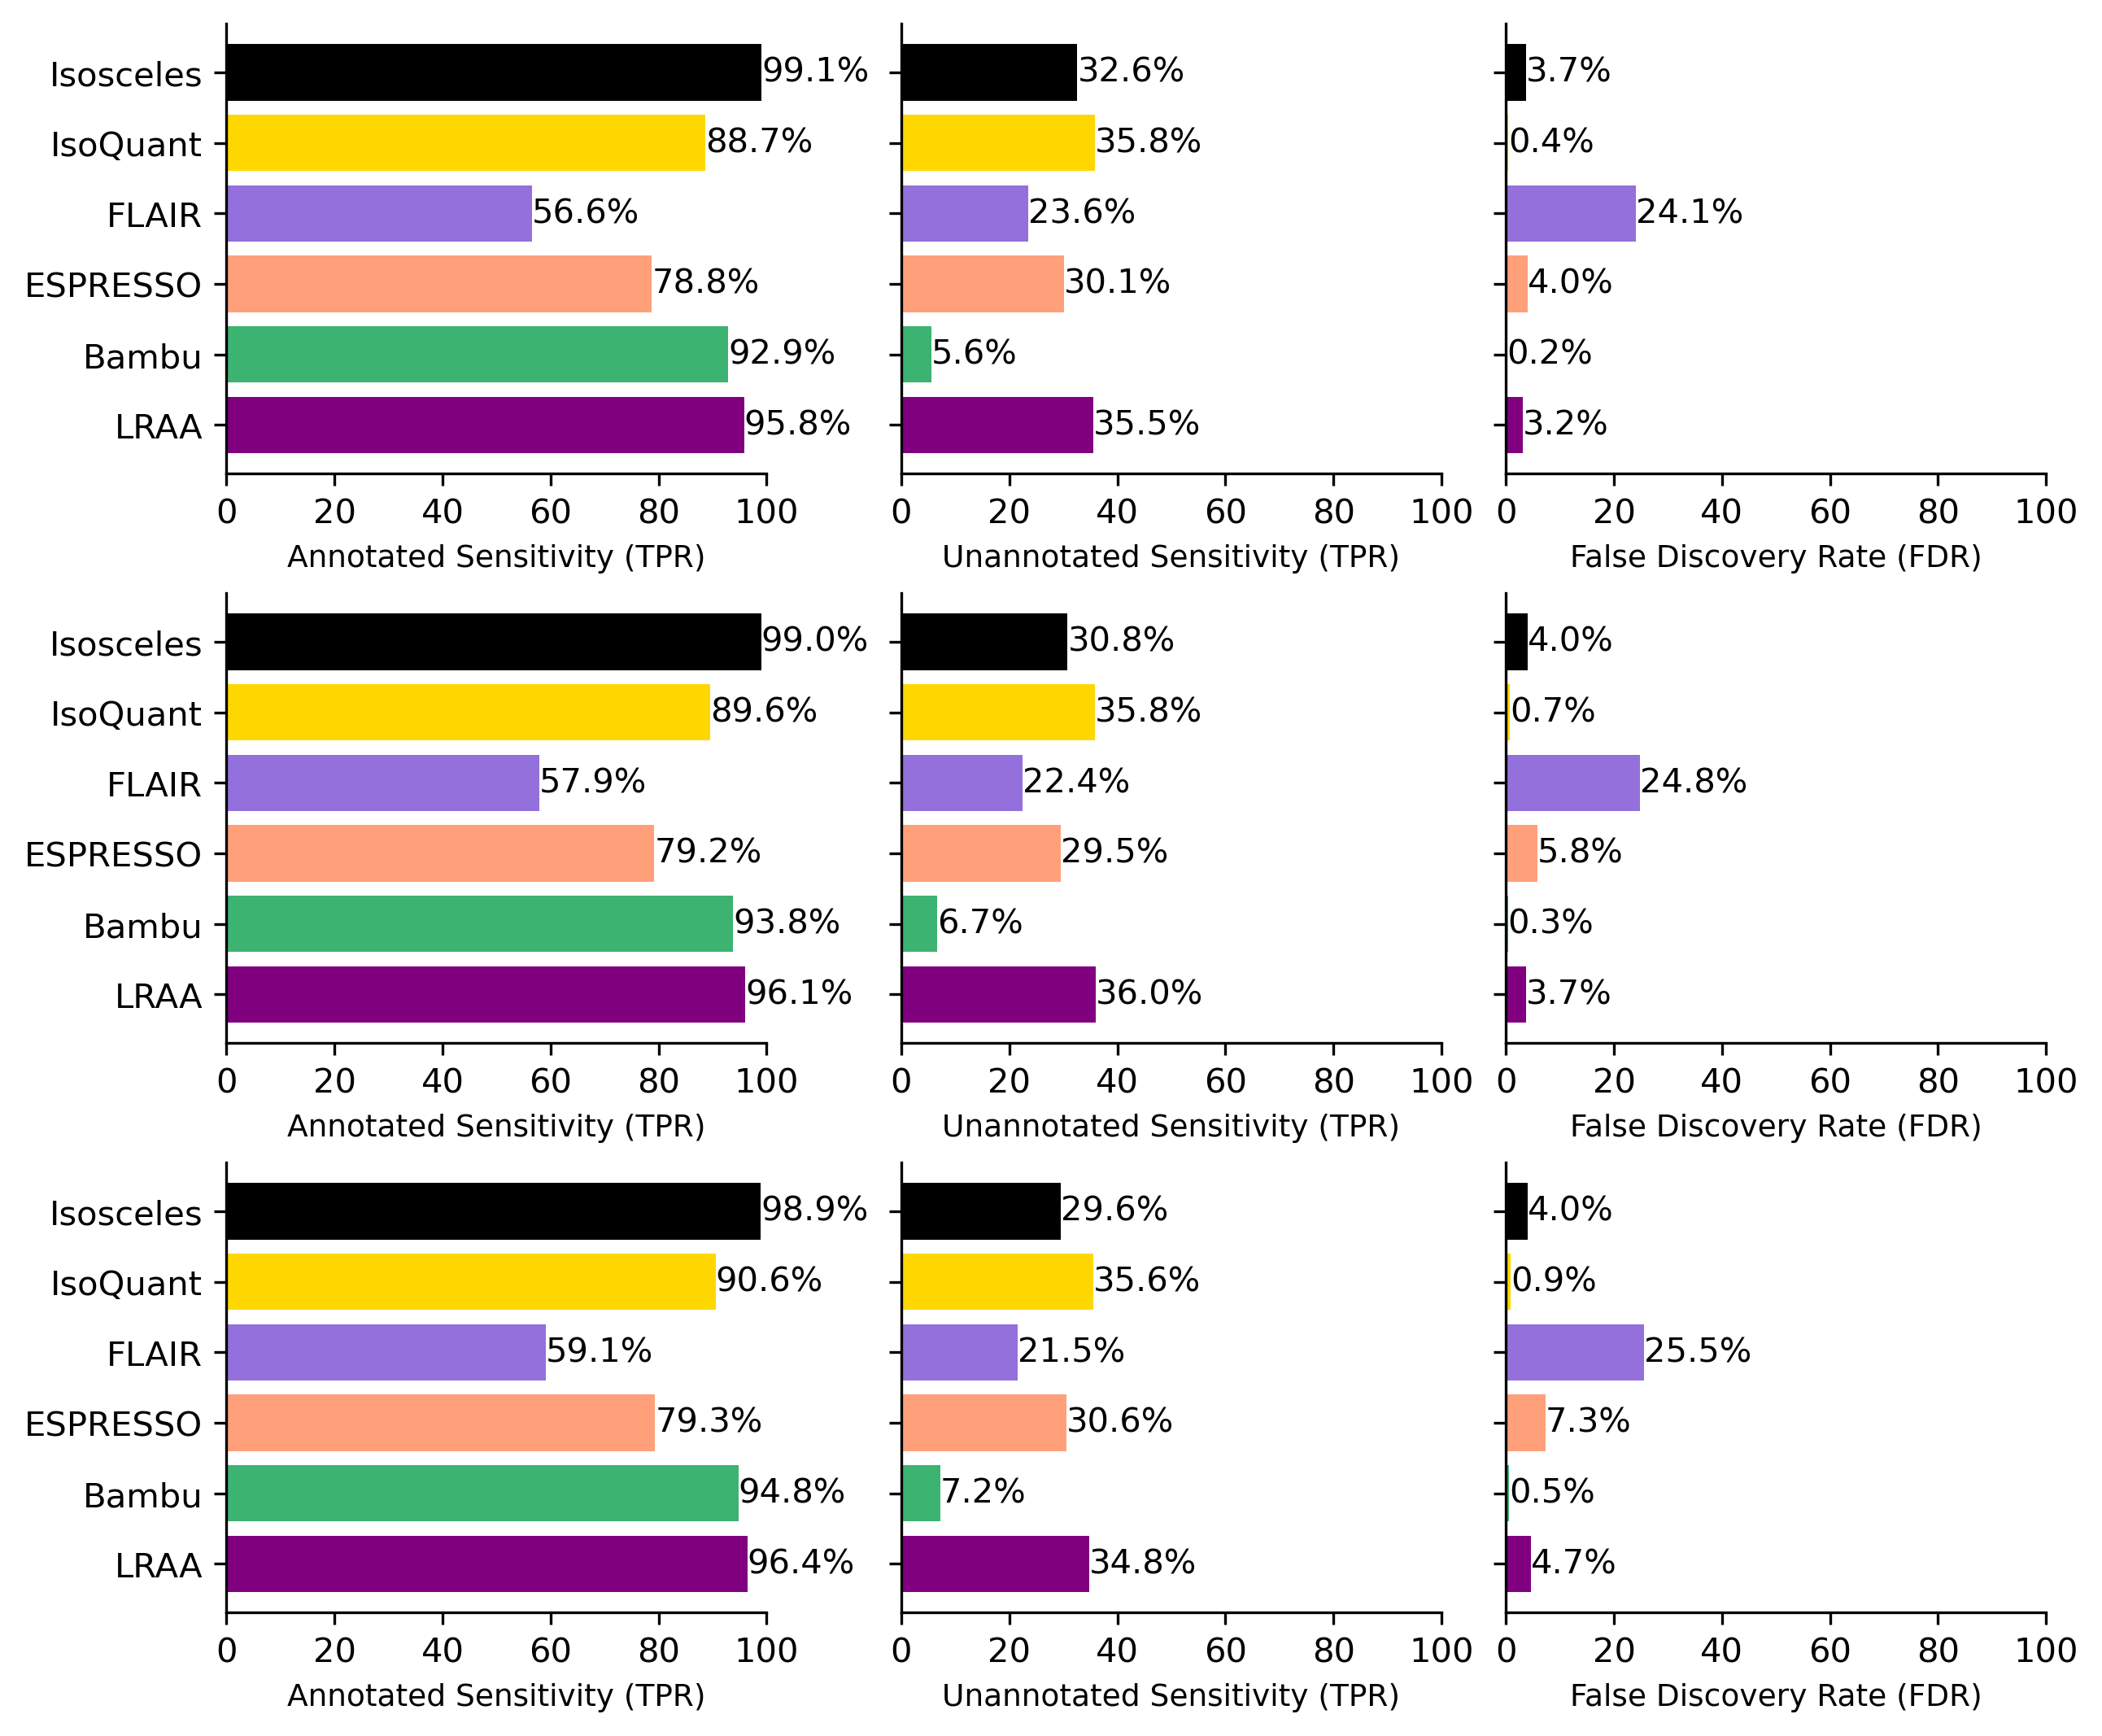

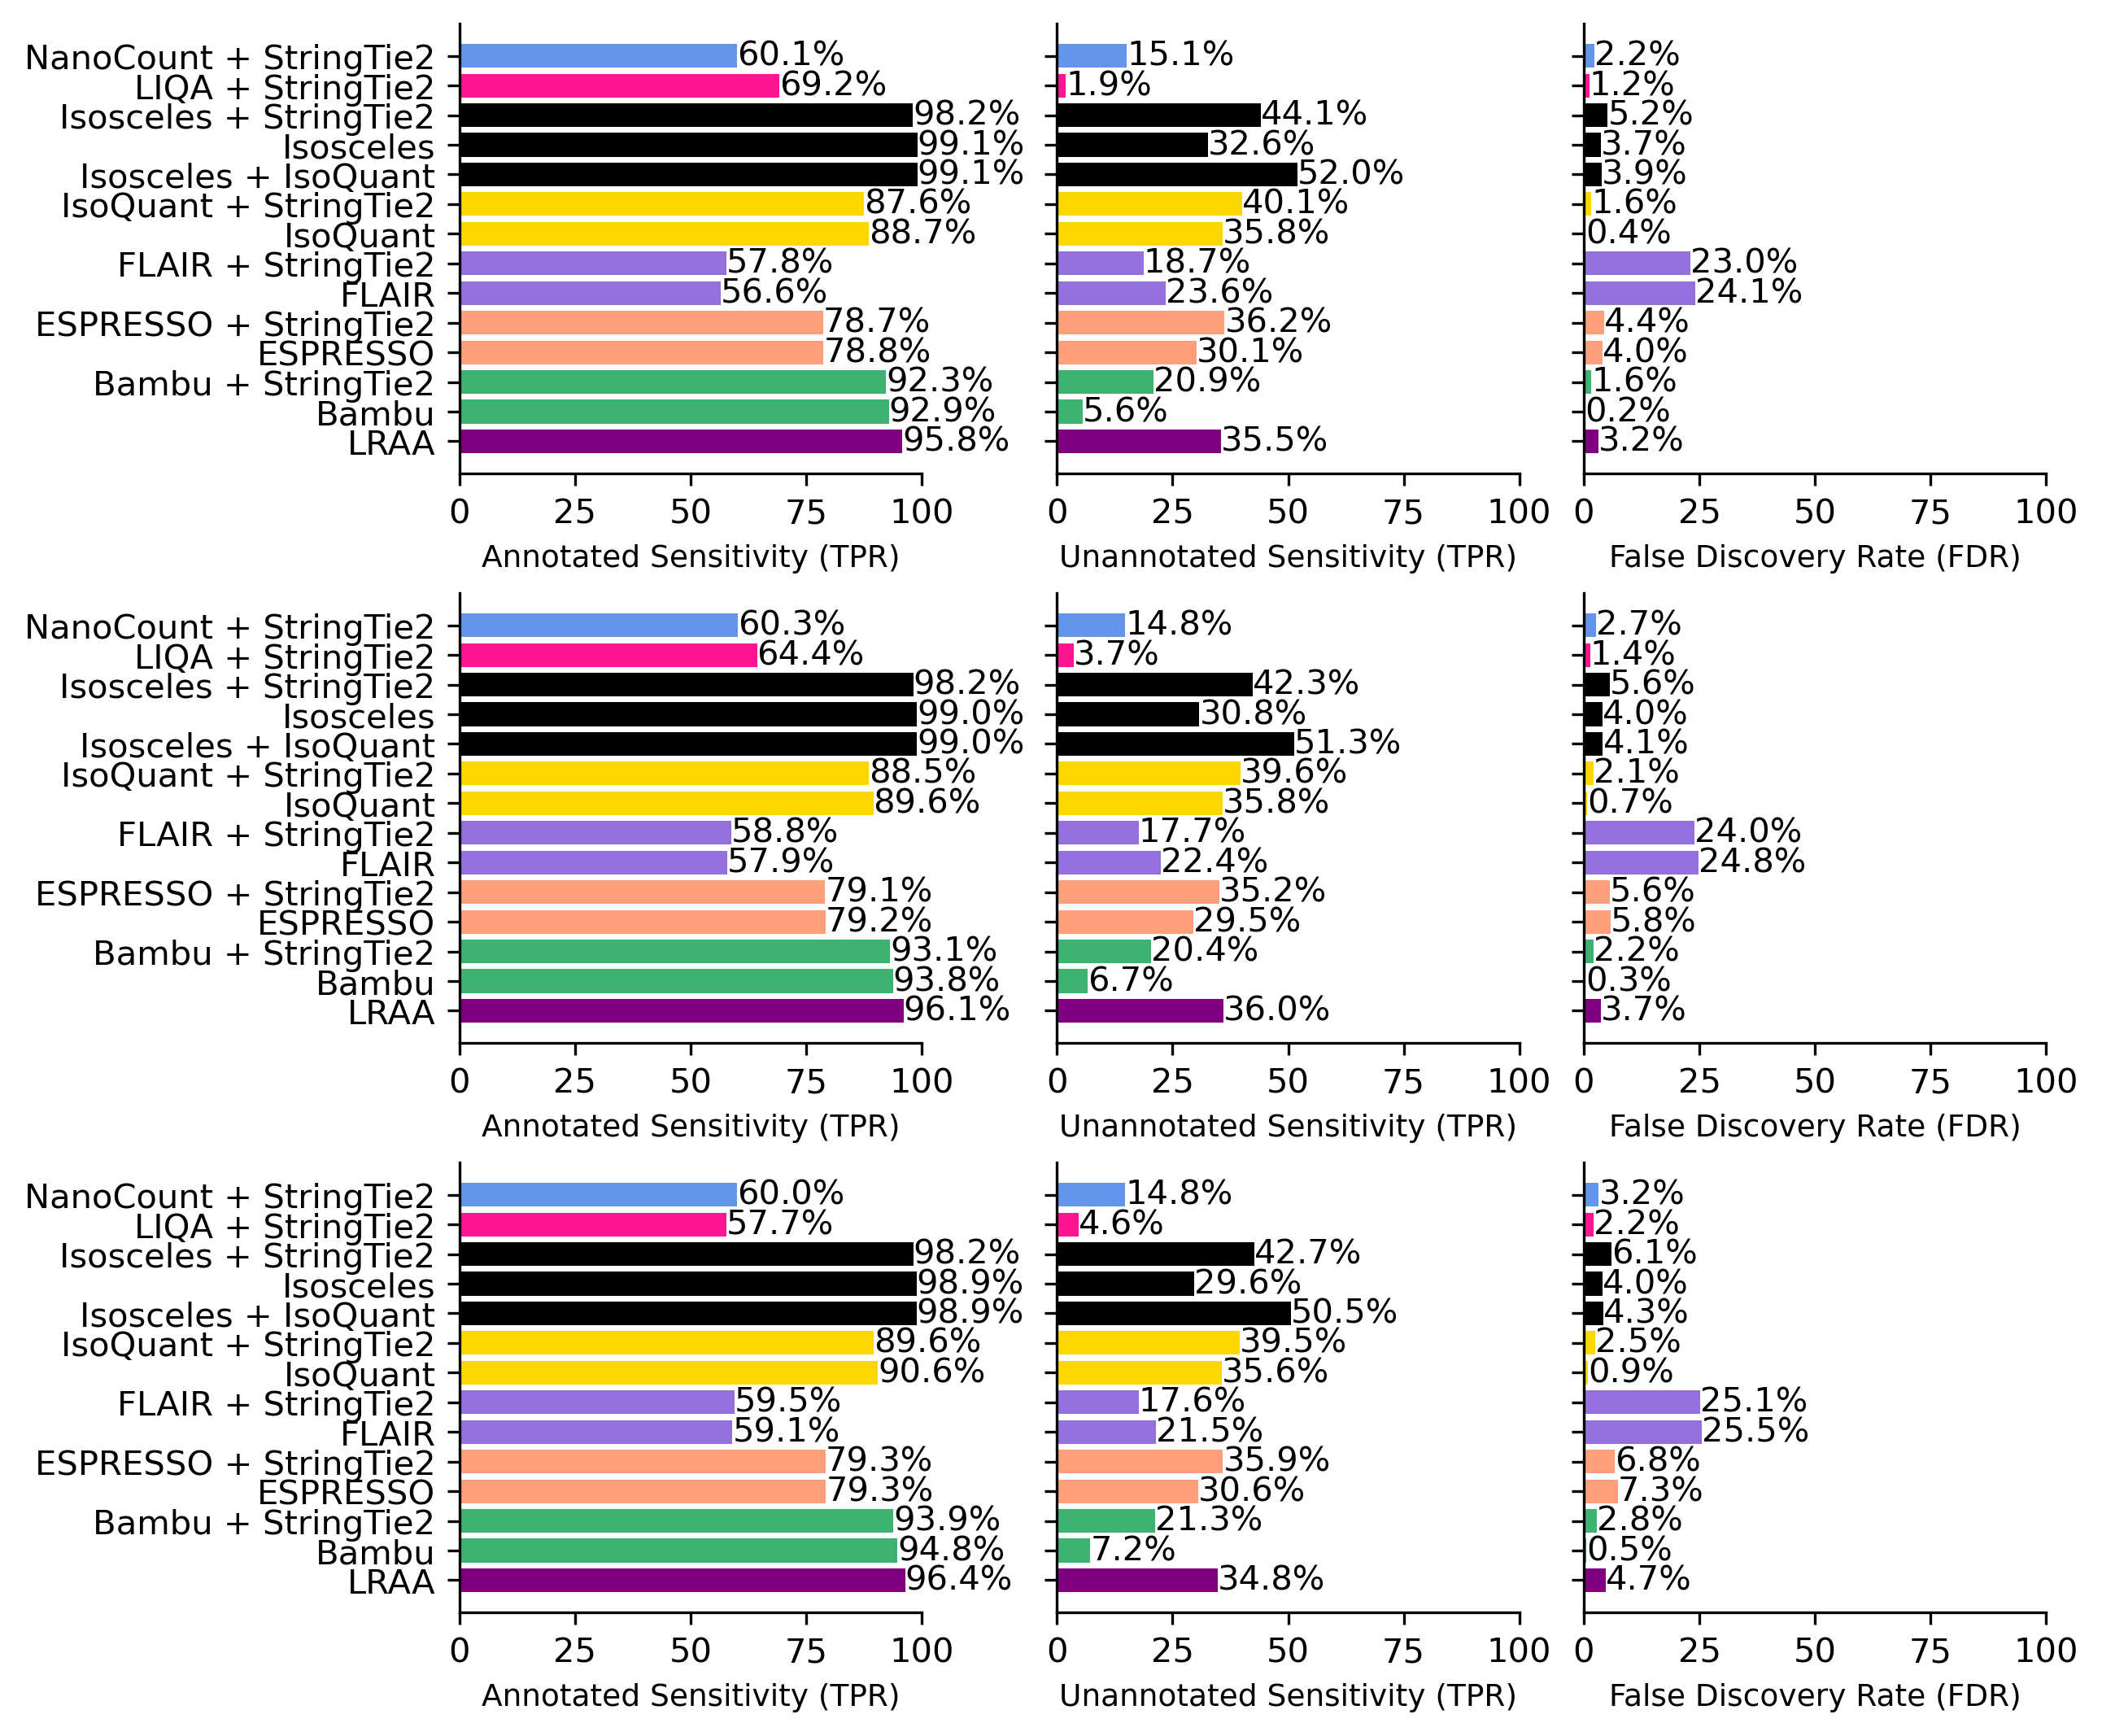

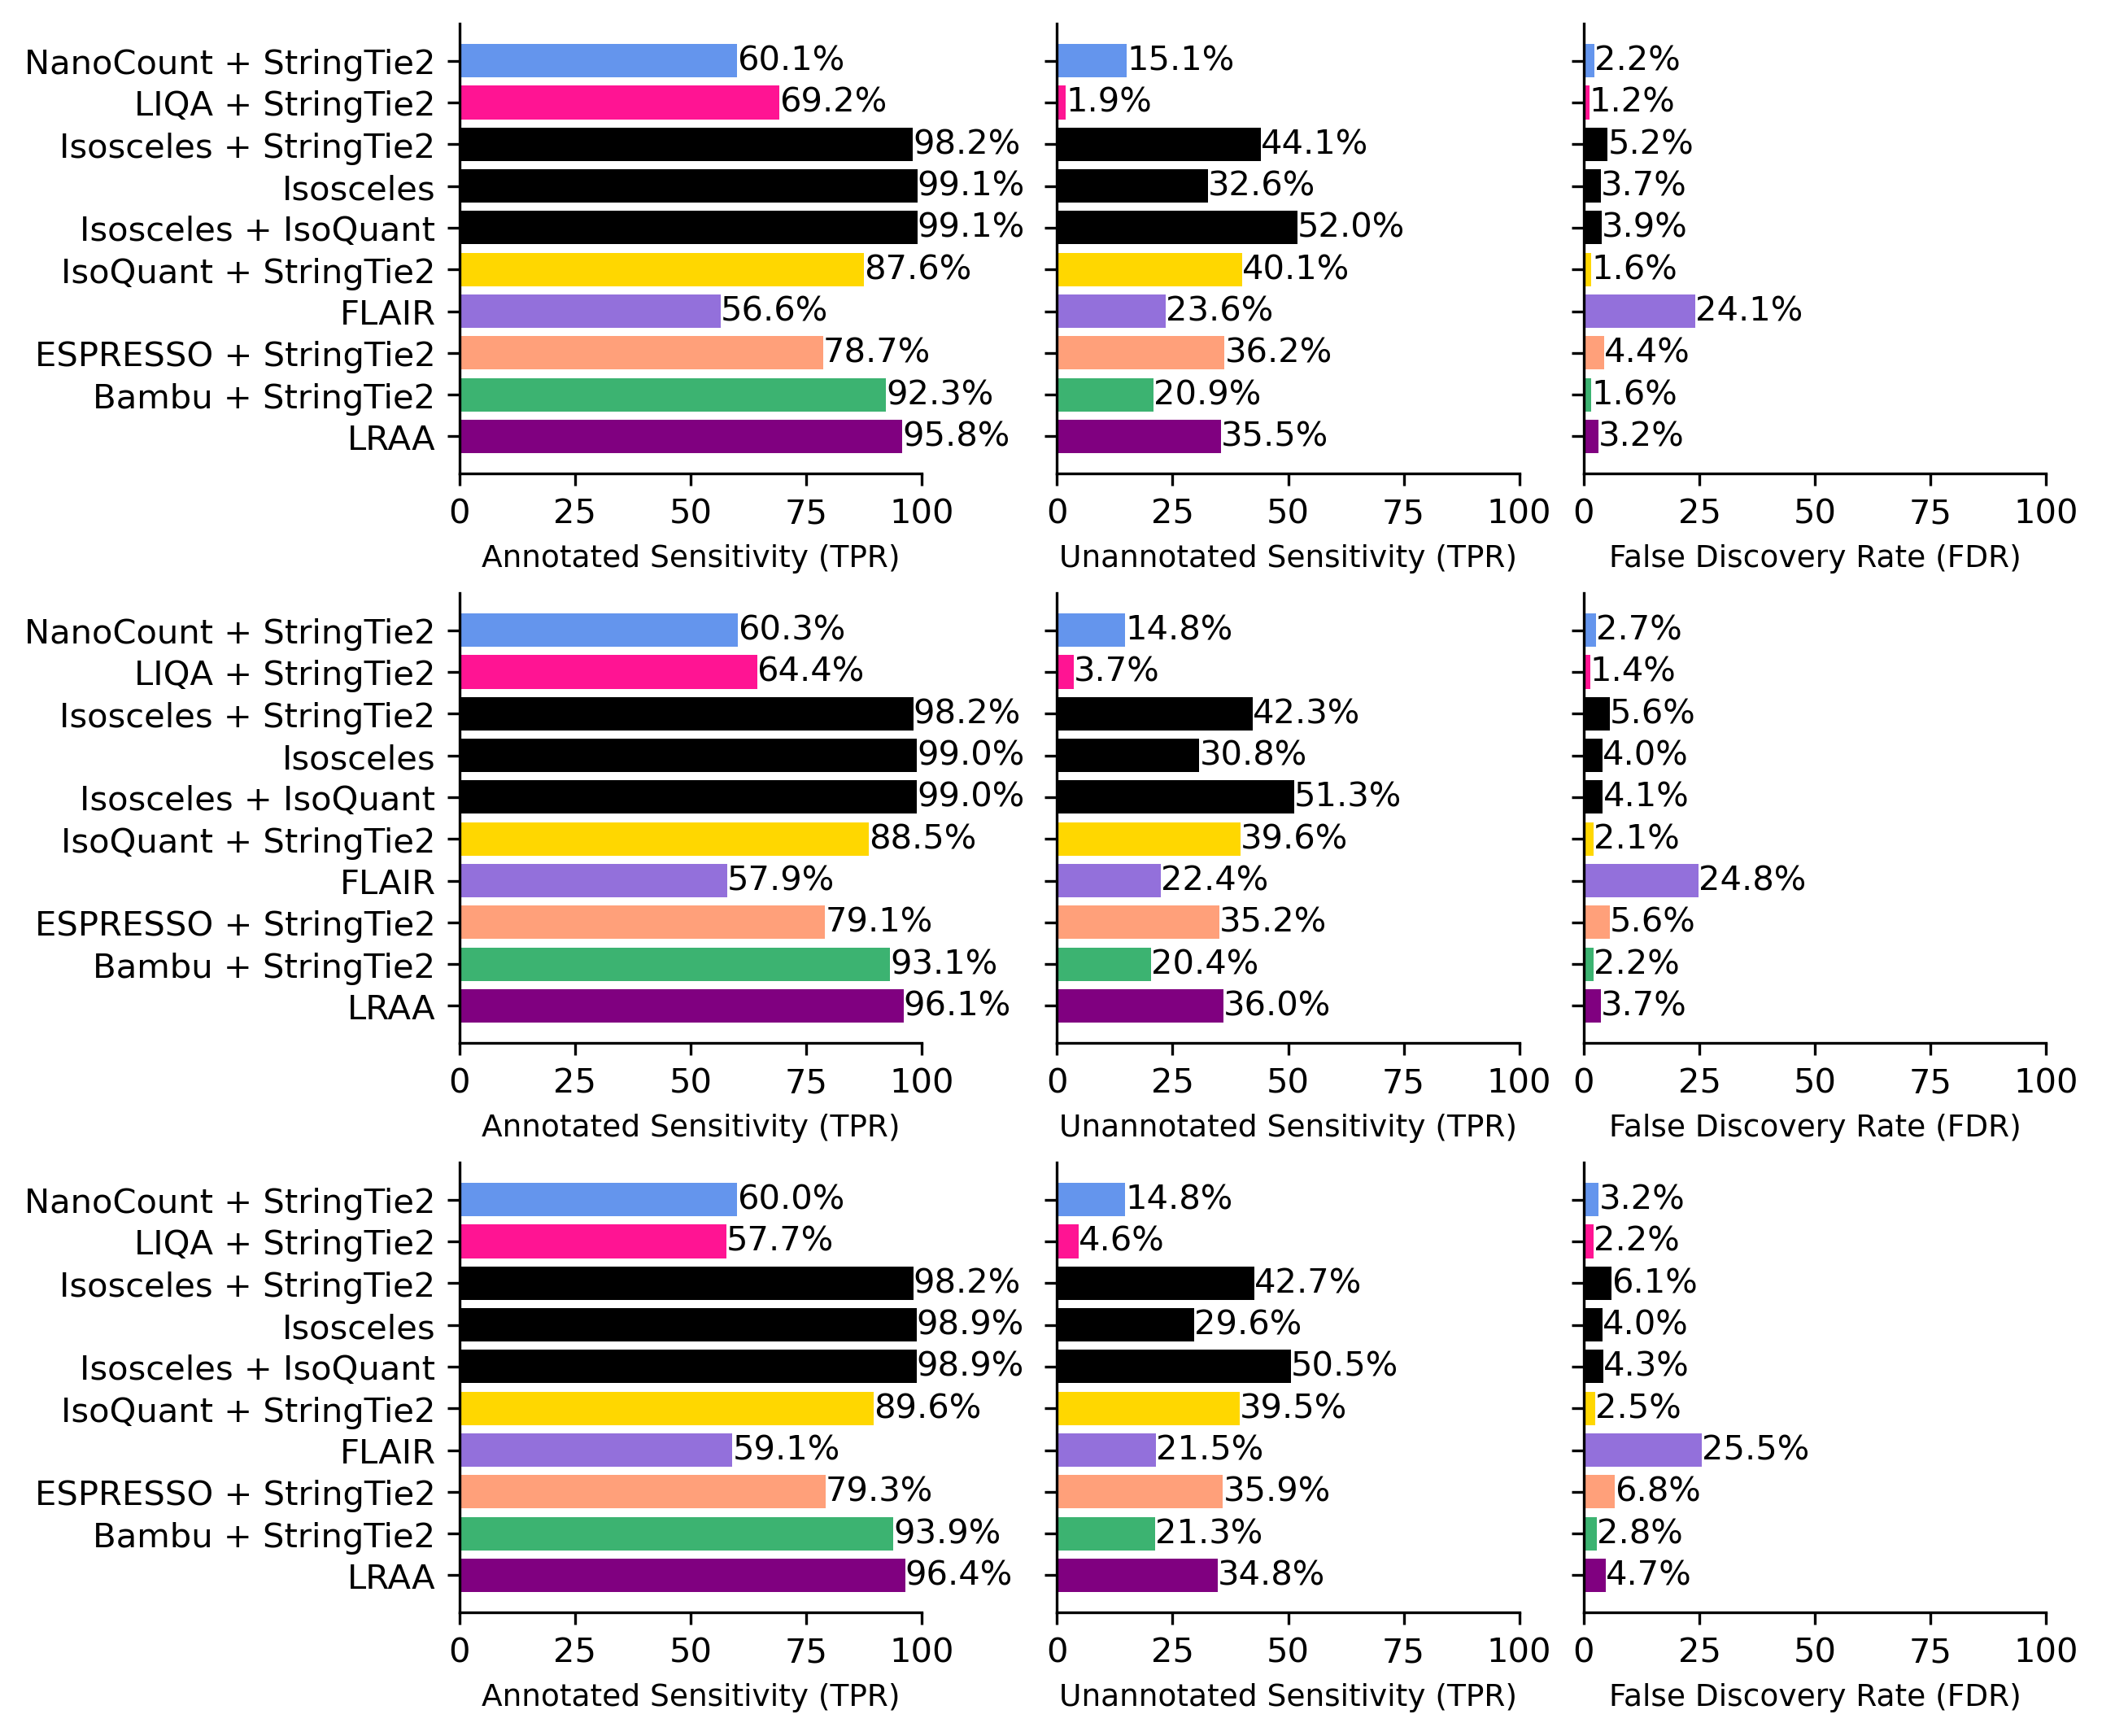

In [24]:
sensitivityStatBarPlot(refDf, dfList, 33)               
sensitivityStatBarPlot(refDf, stringtieDfList, 33)
sensitivityStatBarPlot(refDf, bestDfList, 33)

## Annotated sensitivity, unannotated sensitivity, and FDR for
## down-10, 20, and 30 (rows)


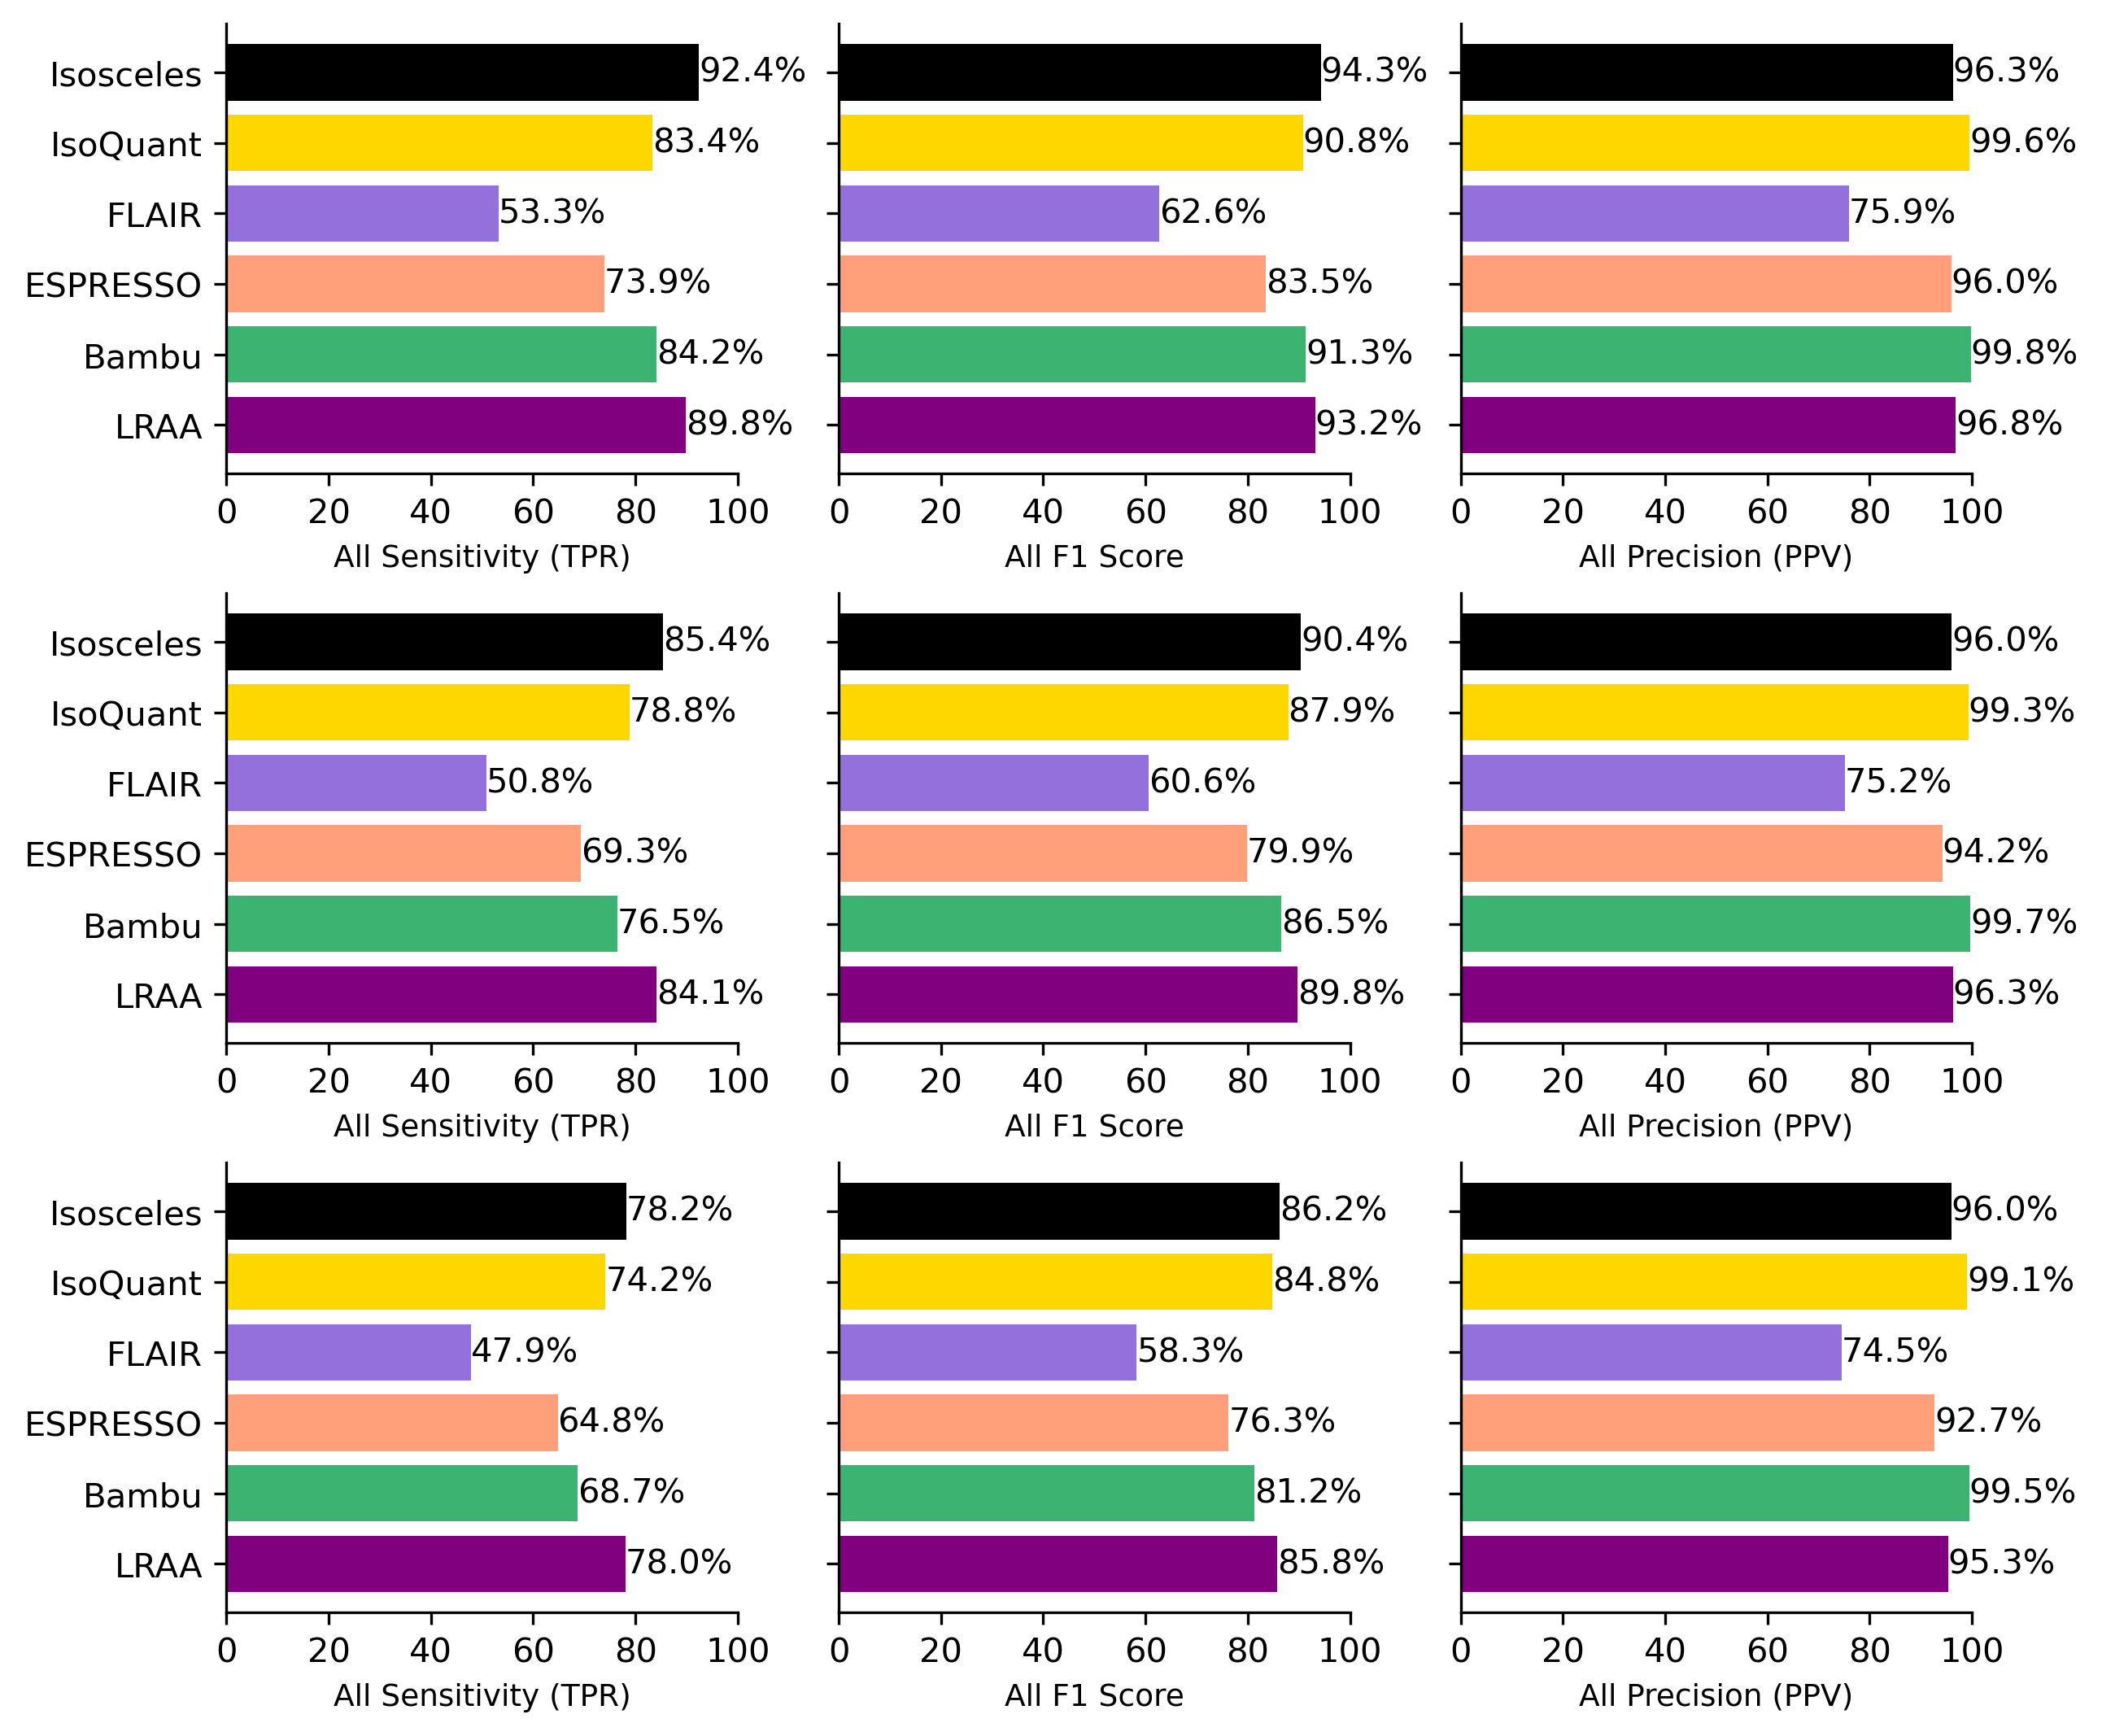

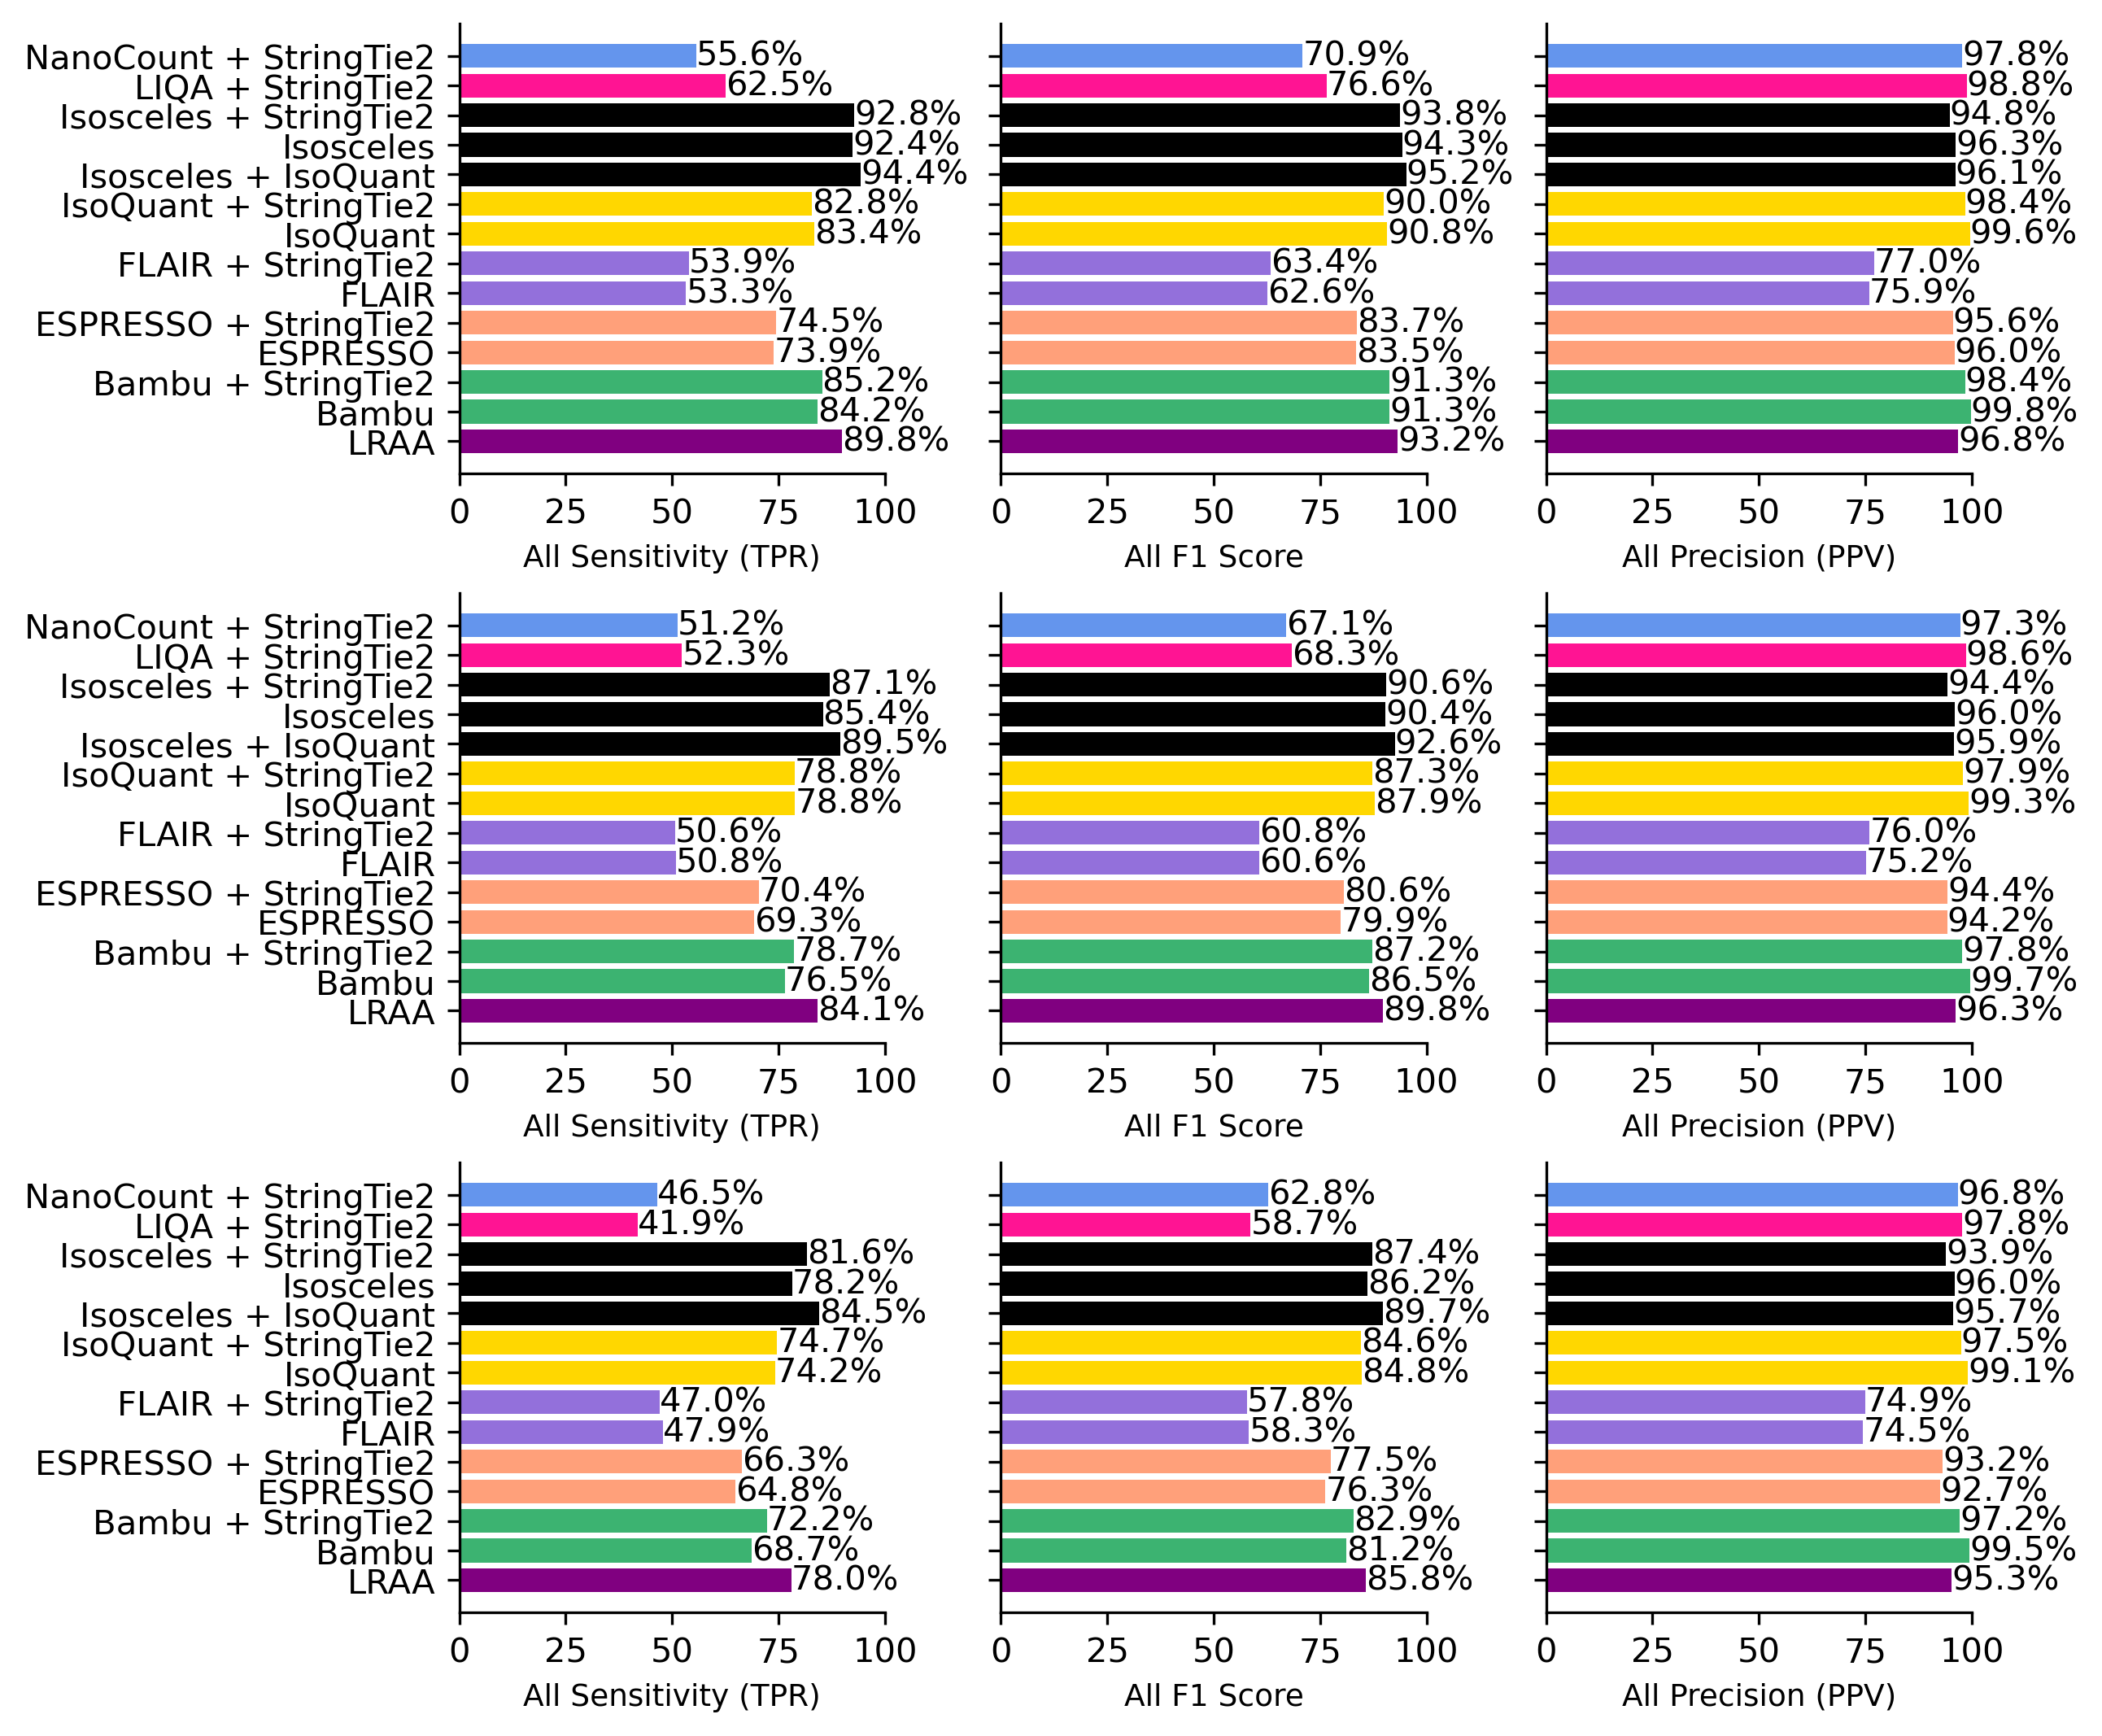

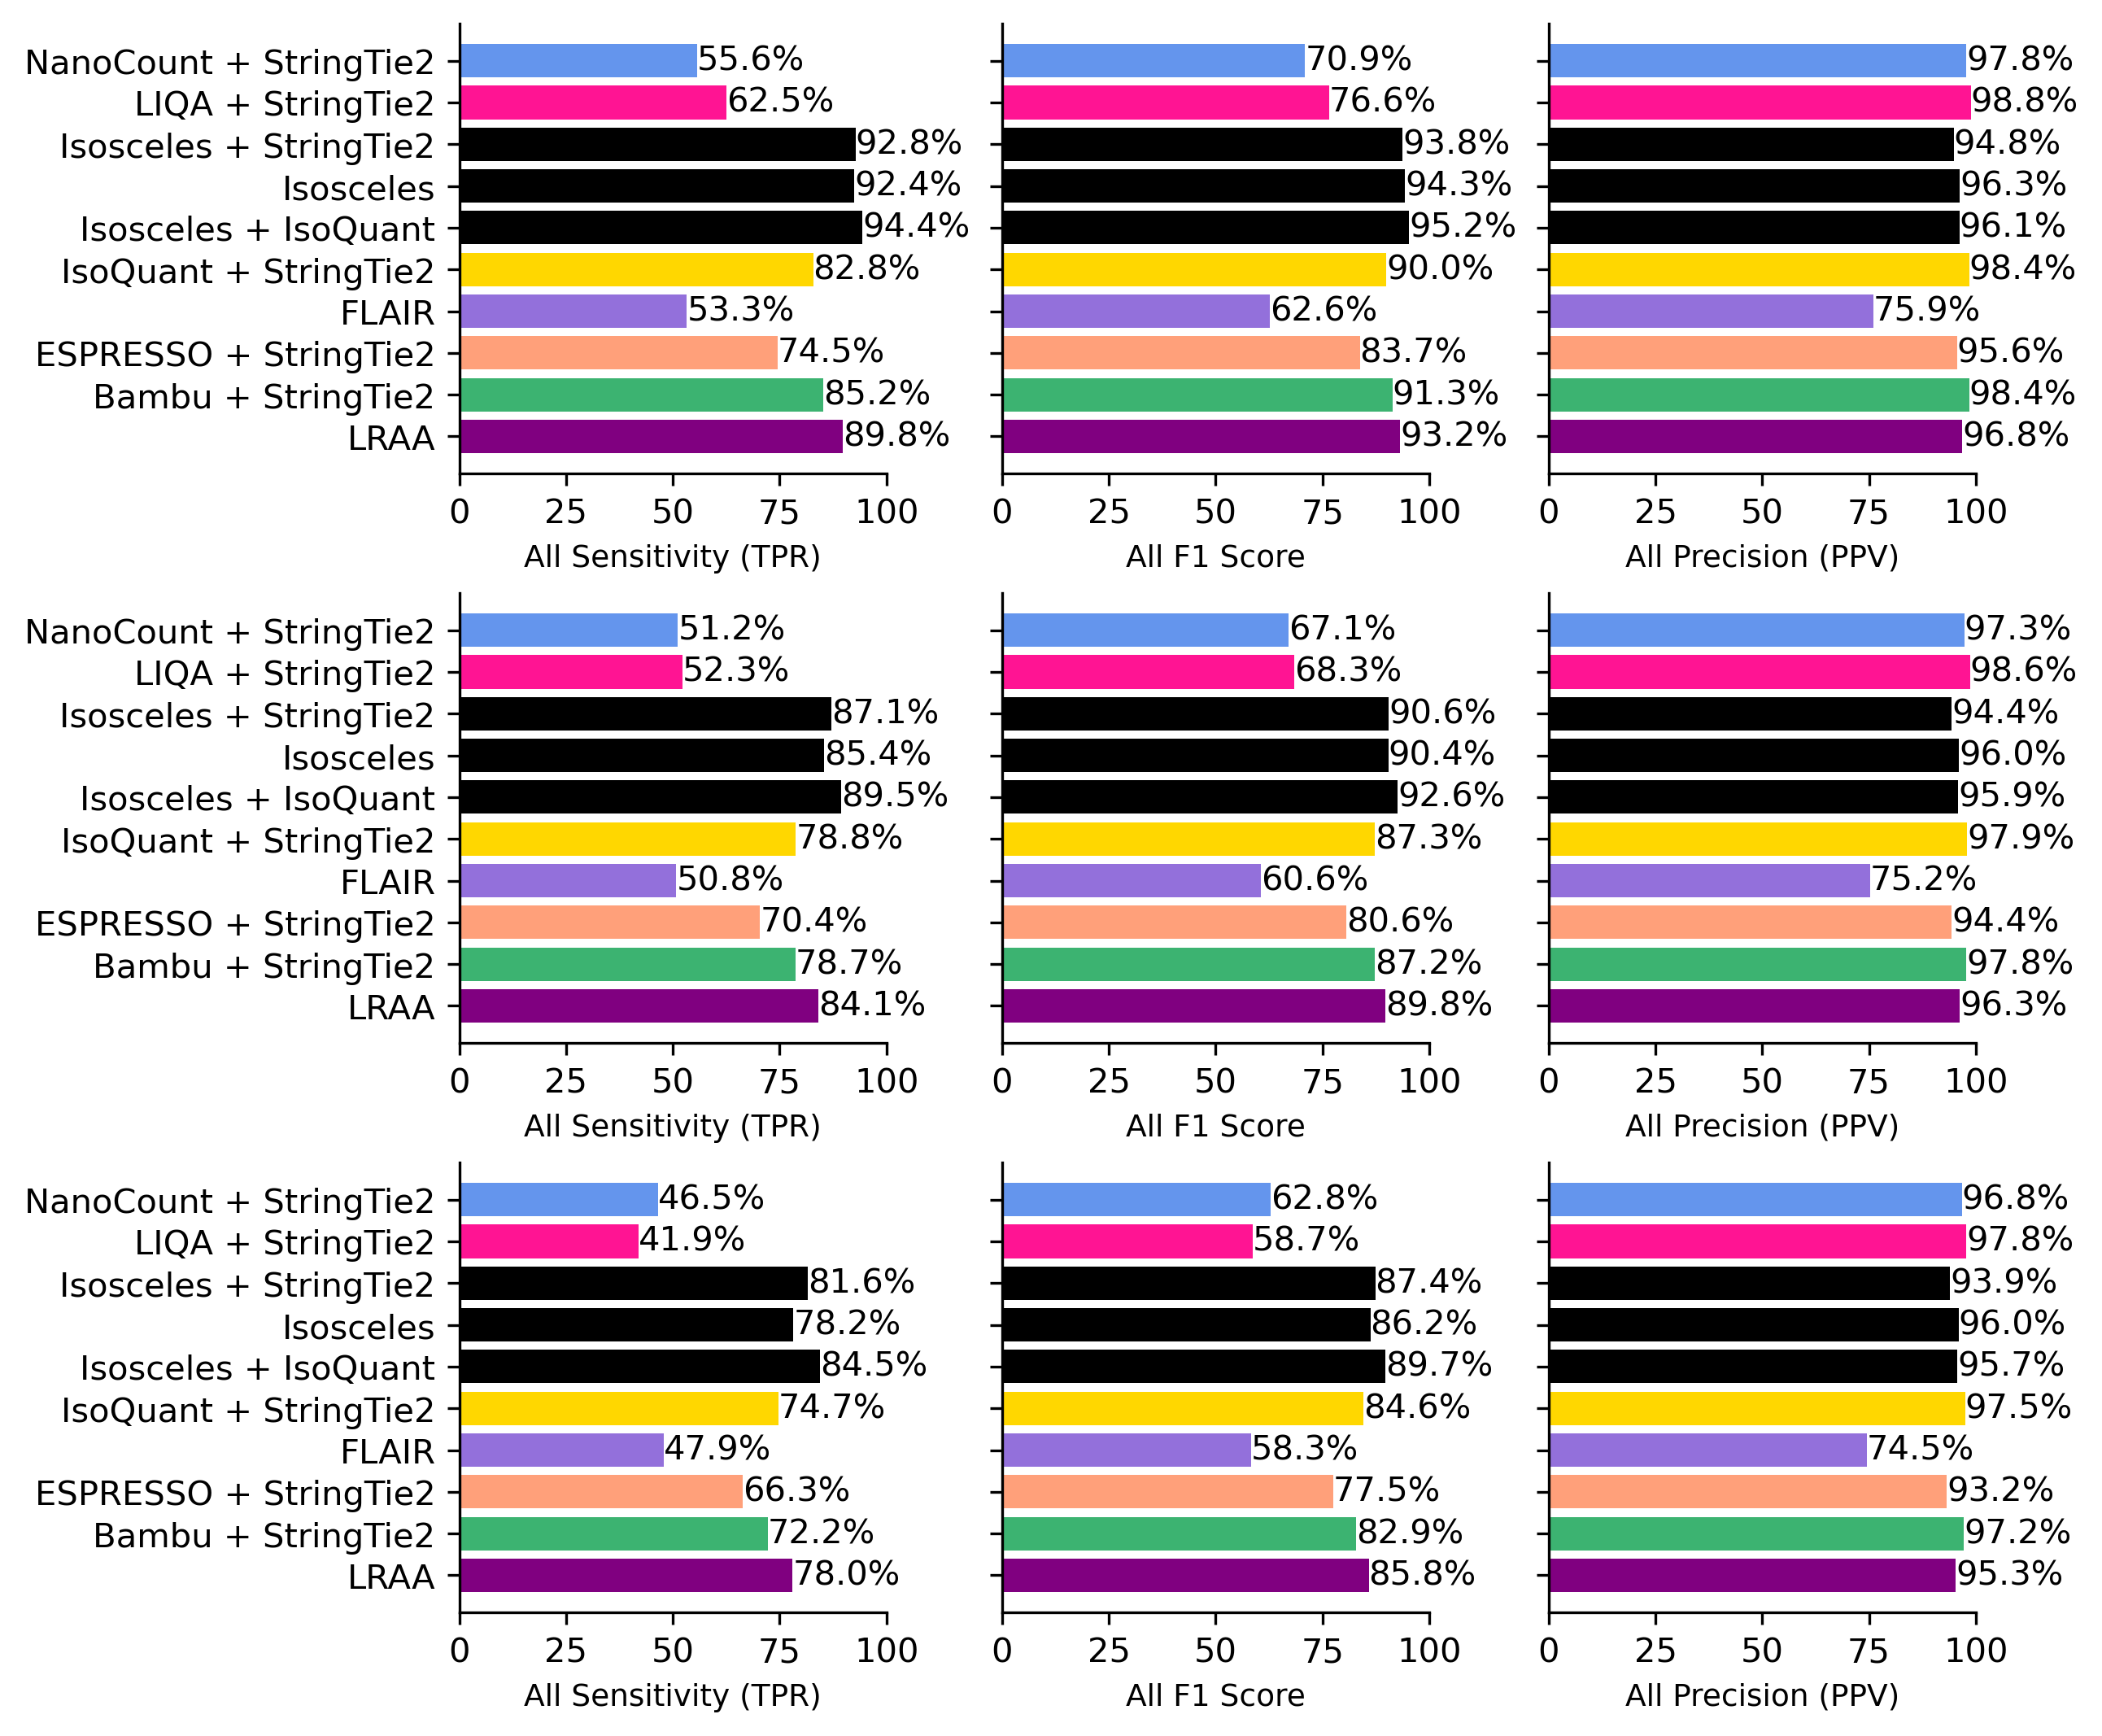

In [25]:
overallStatBarPlot(refDf, dfList, 33)                
overallStatBarPlot(refDf, stringtieDfList, 33)
overallStatBarPlot(refDf, bestDfList, 33)